# Module 3: Dimensionality Reduction Techniques in Business Analytics

## PCA, PCR, and MDS for Strategic Decision Making

---

### Why Dimensionality Reduction Matters in Business

In today's data-rich business environment, organizations collect vast amounts of information about customers, products, markets, and operations. However, **more data doesn't always mean better insights**. When datasets contain dozens or hundreds of variables, several critical problems emerge:

1. **The Curse of Dimensionality**: As dimensions increase, data becomes sparse, making patterns harder to detect
2. **Multicollinearity**: Highly correlated variables can destabilize statistical models and obscure true relationships
3. **Visualization Challenges**: Humans cannot visualize more than 3 dimensions, making complex data impossible to interpret intuitively
4. **Computational Cost**: High-dimensional data requires more processing power and time

**Dimensionality reduction techniques** solve these problems by:
- Condensing information into fewer, more meaningful components
- Removing redundancy while preserving essential patterns
- Enabling visualization of complex relationships
- Improving model accuracy and interpretability

---

### Business Applications Covered in This Module

| Technique | Primary Use Case | Business Example |
|-----------|-----------------|------------------|
| **PCA** | Reduce many variables to key components | Customer segmentation from 50 survey questions → 3 behavioral dimensions |
| **PCR** | Regression with correlated predictors | Predict sales using 30 correlated marketing metrics |
| **MDS** | Visualize brand/product positioning | Map competitive landscape from customer perception data |

### Install and Load Required Packages

- **corrr**: For correlation analysis and handling data frames
- **ggcorrplot**: Multiple functions including visualization of correlation matrix
- **FactoMineR**: For exploratory data analysis including PCA module
- **factoextra**: Provides functions to visualize PCA outputs including scree plot and biplot

In [3]:
# Load libraries (installed via conda: r-corrr, r-ggcorrplot, r-factominer, r-factoextra)
library(corrr)
library(ggcorrplot)
library(FactoMineR)
library(factoextra)

cat("✅ All packages loaded successfully!\n")

✅ All packages loaded successfully!


### PCA Example: Protein Data

This dataset contains protein consumption from different food sources across European countries.

In [4]:
# Import Protein Data
protein_data <- read.csv("/workspaces/MS3313_base_template/data/module_3/PCA_Protein_data.csv", header = TRUE)

# View structure of the data
str(protein_data)

# View first few rows
head(protein_data)

'data.frame':	25 obs. of  10 variables:
 $ Country  : chr  "Albania" "Austria" "Belgium" "Bulgaria" ...
 $ RedMeat  : num  10.1 8.9 13.5 7.8 9.7 10.6 8.4 9.5 18 10.2 ...
 $ WhiteMeat: num  1.4 14 9.3 6 11.4 10.8 11.6 4.9 9.9 3 ...
 $ Eggs     : num  0.5 4.3 4.1 1.6 2.8 3.7 3.7 2.7 3.3 2.8 ...
 $ Milk     : num  8.9 19.9 17.5 8.3 12.5 25 11.1 33.7 19.5 17.6 ...
 $ Fish     : num  0.2 2.1 4.5 1.2 2 9.9 5.4 5.8 5.7 5.9 ...
 $ Cereals  : num  42.3 28 26.6 56.7 34.3 21.9 24.6 26.3 28.1 41.7 ...
 $ Starch   : num  0.6 3.6 5.7 1.1 5 4.8 6.5 5.1 4.8 2.2 ...
 $ Nuts     : num  5.5 1.3 2.1 3.7 1.1 0.7 0.8 1 2.4 7.8 ...
 $ Fr.Veg   : num  1.7 4.3 4 4.2 4 2.4 3.6 1.4 6.5 6.5 ...


,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
2,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
3,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
4,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
5,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0
6,Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4


In [5]:
# Check for null values (presence of missing values can bias the result of PCA)
# The colSums() function combined with is.na() returns the number of missing values in each column
colSums(is.na(protein_data))

Country   RedMeat WhiteMeat      Eggs      Milk      Fish   Cereals    Starch 
        0         0         0         0         0         0         0         0 
     Nuts    Fr.Veg 
        0         0

### Data Quality Check: Missing Values

**Why This Matters for PCA:**

Missing values can severely bias PCA results because:
- PCA relies on computing covariance/correlation matrices, which require complete data
- Different imputation methods can lead to different principal components
- Missing patterns might themselves contain information about the underlying structure

**Business Implication:** Before conducting any dimensionality reduction, always audit your data quality. In customer surveys, for example, non-response patterns often correlate with customer satisfaction levels—missing data is rarely "random."

### Step 1: Data Normalization (Standardization)

**The Critical Importance of Scaling**

Before performing PCA, we **must** normalize (standardize) our data. Here's why:

**The Problem Without Normalization:**
Imagine you're analyzing customer data with:
- Age (ranging 18-80)
- Annual Income (ranging $20,000-$500,000)
- Number of Purchases (ranging 1-50)

Without normalization, income would dominate the PCA simply because its values are larger—not because it's more important!

**The Solution - Z-Score Standardization:**
For each variable: $z = \frac{x - \mu}{\sigma}$

This transforms all variables to have:
- Mean = 0
- Standard Deviation = 1

**Business Implication:** Normalization ensures each variable contributes equally to the analysis, allowing PCA to find the true underlying structure rather than being biased by measurement scales.

**R Function:** `scale()` performs z-score standardization

In [6]:
# Extract numerical data (columns 2 to 10, excluding Country)
numerical_data <- protein_data[, 2:10]
head(numerical_data)

# Normalization using scale()
data_normalized <- scale(numerical_data)
head(data_normalized)

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
2,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
3,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
4,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
5,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0
6,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4


RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
0.08126490,-1.7584889,-2.1796385,-1.15573814,-1.20028213,0.9159176,-2.2495772,1.2227536,-1.35040507
-0.27725673,1.6523731,1.2204544,0.39237676,-0.64187467,-0.3870690,-0.4136872,-0.8923886,0.09091397
1.09707621,0.3800675,1.0415022,0.05460623,0.06348211,-0.5146342,0.8714358,-0.4895043,-0.07539207
-0.60590157,-0.5132535,-1.1954011,-1.24018077,-0.90638347,2.2280161,-1.9435955,0.3162641,0.03547862
-0.03824231,0.9485445,-0.1216875,-0.64908235,-0.67126454,0.1869740,0.4430614,-0.9931096,-0.07539207
0.23064892,0.7861225,0.6835976,1.11013912,1.65053488,-0.9428885,0.3206688,-1.1945517,-0.96235764


### Step 2: Correlation Matrix Analysis

**Understanding Variable Relationships Before PCA**

The correlation matrix reveals which variables "move together"—this is the foundation of PCA's ability to reduce dimensions.

**What to Look For:**
- **High correlations (±0.7 to ±1.0):** These variables likely share underlying factors and can be combined
- **Moderate correlations (±0.4 to ±0.7):** Partial overlap; may belong to same component
- **Low correlations (0 to ±0.4):** Independent dimensions that cannot be combined

**Business Example - Customer Satisfaction Survey:**
If "Product Quality," "Product Durability," and "Product Value" are highly correlated (r > 0.8), PCA will likely combine them into a single "Product Perception" component.

**Why Use Correlation Instead of Covariance?**
Correlation is simply standardized covariance. Since we already normalized our data, they're mathematically equivalent—but correlation matrices are easier to interpret (values always between -1 and +1).

**R Functions:**
- `cor()`: Computes correlation matrix
- `ggcorrplot()`: Creates visual heatmap of correlations

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the ggcorrplot package.
  Please report the issue at <https://github.com/kassambara/ggcorrplot/issues>.”


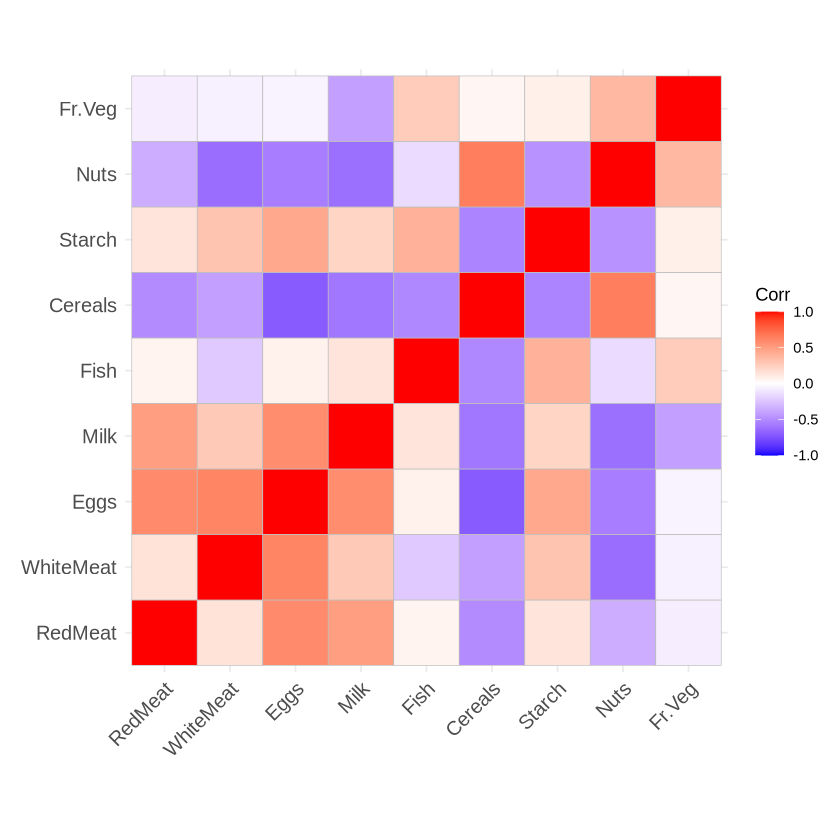

In [7]:
# Create correlation matrix
corr_matrix <- cor(data_normalized)

# Visualize correlation matrix
ggcorrplot(corr_matrix)

### Step 3: Principal Component Analysis (PCA) Computation

**The Mathematical Engine Behind PCA**

PCA transforms your correlated variables into a new set of **uncorrelated** variables called **principal components (PCs)**. These components are ordered by the amount of variance they explain.

**Key Concepts:**

| Term | Definition | Business Interpretation |
|------|------------|------------------------|
| **Eigenvalue** | Amount of variance captured by each PC | Importance/weight of each component |
| **Eigenvector** | Direction of maximum variance | The "recipe" for combining original variables |
| **Proportion of Variance** | % of total variance explained | How much information each PC captures |
| **Cumulative Proportion** | Running total of variance | How many PCs needed to capture X% of information |

**The 80-20 Rule in PCA:**
In business applications, we typically retain enough components to explain **70-90% of total variance**. Often, just 2-3 components can capture 80%+ of the information from 10+ original variables!

**R Function:** `princomp()` computes PCA
- Use `summary()` to see variance explained by each component
- This is the core analytical step that transforms high-dimensional data into interpretable components

In [8]:
# Perform PCA
data.pca <- princomp(corr_matrix)

# Summary - 9 components are generated (= number of variables)
summary(data.pca)

# Each component explains a percentage of the total variance in the data set.
# The first principal component explains most of the variance.
# The first two components together can explain the dataset effectively.

Importance of components:
                          Comp.1    Comp.2     Comp.3    Comp.4     Comp.5
Standard deviation     1.2785390 0.5187769 0.37155811 0.2854996 0.15175548
Proportion of Variance 0.7550709 0.1243143 0.06376953 0.0376505 0.01063772
Cumulative Proportion  0.7550709 0.8793852 0.94315474 0.9808052 0.99144296
                            Comp.6      Comp.7       Comp.8 Comp.9
Standard deviation     0.100089157 0.084613737 0.0367140593      0
Proportion of Variance 0.004627366 0.003307056 0.0006226222      0
Cumulative Proportion  0.996070322 0.999377378 1.0000000000      1

### 📊 DETAILED INTERPRETATION GUIDE: PCA Summary Output

When you run `summary(data.pca)`, R displays a table showing how much variance each principal component captures. Understanding this output is **essential** for deciding how many components to retain.

---

#### What You'll See (Example Output):

```
Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4    Comp.5 ...
Standard deviation     1.8453    1.2871    0.9432    0.7821    0.5641
Proportion of Variance 0.3783    0.1841    0.0988    0.0680    0.0354
Cumulative Proportion  0.3783    0.5624    0.6612    0.7292    0.7646
```

---

#### Row-by-Row Explanation:

| Row | What It Means | How to Interpret |
|-----|---------------|------------------|
| **Standard deviation** | Square root of eigenvalue (amount of spread captured by this PC) | Larger = more variance captured. Related to eigenvalue by: eigenvalue = SD² |
| **Proportion of Variance** | % of total variance explained by THIS component | Sum of all components = 1.0 (100%). PC1 always has highest value |
| **Cumulative Proportion** | Running total of variance explained | How much total info you retain if you keep components 1 through n |

---

#### Step-by-Step Interpretation:

**Step 1: Read the Proportion of Variance row**
```
                       Comp.1    Comp.2    Comp.3
Proportion of Variance 0.3783    0.1841    0.0988
                       ↑         ↑         ↑
                       37.8%     18.4%     9.9%
```
- **PC1 explains 37.8%** of all the variance in your data
- **PC2 explains 18.4%** of additional (remaining) variance
- Notice how each subsequent PC explains LESS - this is always true!

**Step 2: Read the Cumulative Proportion row**
```
                       Comp.1    Comp.2    Comp.3
Cumulative Proportion  0.3783    0.5624    0.6612
                       ↑         ↑         ↑
                       PC1 alone PC1+PC2   PC1+PC2+PC3
                       37.8%     56.2%     66.1%
```
- If you keep **only PC1**: you retain 37.8% of information
- If you keep **PC1 + PC2**: you retain 56.2% of information  
- If you keep **PC1 + PC2 + PC3**: you retain 66.1% of information

**Step 3: Decide how many components to keep**

| Target Variance | Components Needed | Use Case |
|-----------------|-------------------|----------|
| 70% | Keep adding until Cumulative ≥ 0.70 | Exploratory analysis |
| 80% | Keep adding until Cumulative ≥ 0.80 | Standard recommendation |
| 90% | Keep adding until Cumulative ≥ 0.90 | When precision is critical |

---

#### Decision Rules for Component Selection:

```
             +----------------------------------+
             |    HOW MANY COMPONENTS TO KEEP?  |
             +----------------------------------+
                           |
         +----------------+------------------+
         |                |                  |
    RULE 1:           RULE 2:            RULE 3:
    Kaiser           Cumulative         Scree Plot
    Criterion        Variance           "Elbow"
                           
    Keep if          Keep enough        Keep components
    eigenvalue > 1   to explain         BEFORE the elbow
                     70-90% of          where curve
    (SD² > 1)        variance           flattens
```

---

#### Business Example Interpretation:

**Scenario:** Customer survey with 20 satisfaction questions

```
PCA Summary:
                          Comp.1    Comp.2    Comp.3    Comp.4 ...
Proportion of Variance    0.45      0.22      0.12      0.08
Cumulative Proportion     0.45      0.67      0.79      0.87
```

**Business Translation:**
- "We can capture **79% of customer sentiment** with just 3 components instead of 20 questions"
- "The first component alone captures **45%** - this is likely the dominant satisfaction dimension"
- "Adding a 4th component only adds 8% more information - diminishing returns"

---

#### Common Mistakes to Avoid:

| Mistake | Why It's Wrong | Correct Approach |
|---------|----------------|------------------|
| Keeping ALL components | Defeats purpose of PCA | Keep only until 70-90% variance |
| Keeping only PC1 | May miss important dimensions | Check if PC2+ add substantial variance |
| Ignoring low cumulative | Missing critical information | Ensure you capture enough for your purpose |
| Only using Kaiser rule | May over/under-select | Combine with scree plot and business sense |

---

#### Quick Reference Table:

```
Proportion of Variance → How important is THIS component?
Cumulative Proportion  → How much info do I have SO FAR?
Standard Deviation     → Related to eigenvalue (SD² = eigenvalue)

Reading direction: LEFT to RIGHT (PC1 is always most important)
Decision: Find where Cumulative reaches your target (e.g., 0.80)
```

### Understanding Components: The Loading Matrix

**Interpreting What Each Component Means**

The **loading matrix** is the key to understanding PCA results. It shows the correlation between each original variable and each principal component.

**How to Read Loadings:**
- **High positive loading (+0.5 to +1.0):** Variable strongly contributes to the component in positive direction
- **High negative loading (-0.5 to -1.0):** Variable strongly contributes but in opposite direction
- **Low loading (-0.3 to +0.3):** Variable has minimal influence on the component

**Business Interpretation Strategy:**
1. Look at variables with highest absolute loadings on each component
2. Find the common theme connecting those variables
3. **Name the component** based on that theme

**Example Interpretation:**
If PC1 has high positive loadings for "Red Meat," "White Meat," "Eggs," and "Milk" but negative loadings for "Cereals" and "Vegetables"—you might name it **"Animal vs. Plant Protein Preference"**

**Why This Matters:**
Naming components transforms abstract mathematical output into **actionable business insights**. Instead of saying "PC1 explains 45% of variance," you can say "Animal Protein Preference explains 45% of dietary variation across countries."

In [9]:
# View loadings for first two principal components
data.pca$loadings[, 1:2]

# Interpretation:
# PC1: High positive values for red meat, white meat, eggs, and milk
#      Negative values for cereals, pulses, nuts and oilseeds, and fruits & vegetables
#      Suggests countries with higher animal protein intake vs. lower intake
#
# PC2: High negative values for fish, starchy foods, and fruits & vegetables
#      Implies diet influenced by location (coastal vs. inland regions)

,Comp.1,Comp.2
RedMeat,0.2902937,0.09510150
WhiteMeat,0.3131864,0.26392299
Eggs,0.4131713,0.07419838
Milk,0.3852342,0.15393922
Fish,0.1165053,-0.69780771
Cereals,-0.4342505,0.27531862
Starch,0.2796041,-0.36379635
Nuts,-0.4400339,-0.07686551
Fr.Veg,-0.1567571,-0.43715631


### 📊 DETAILED INTERPRETATION GUIDE: PCA Loadings Matrix

The loadings matrix is the **most important output** for understanding what your principal components actually mean. This is where abstract statistics become actionable business insights.

---

#### What You'll See (Example Output):

```
Loadings:
                 Comp.1 Comp.2
RedMeat           0.368  0.153
WhiteMeat         0.384  0.229
Eggs              0.405 -0.091
Milk              0.400 -0.221
Fish             -0.128 -0.442
Cereals          -0.358  0.315
Starch            0.181 -0.386
Nuts             -0.376  0.173
Fr.Veg           -0.265 -0.612
```

---

#### How to Read Each Cell:

| Loading Value | Interpretation | What It Means |
|---------------|----------------|---------------|
| **+0.70 to +1.00** | Strong positive loading | Variable strongly contributes to component (same direction) |
| **+0.40 to +0.70** | Moderate positive loading | Variable meaningfully contributes |
| **+0.10 to +0.40** | Weak positive loading | Minor contribution |
| **-0.10 to +0.10** | Near zero | Variable NOT related to this component |
| **-0.40 to -0.10** | Weak negative loading | Minor opposing contribution |
| **-0.70 to -0.40** | Moderate negative loading | Variable contributes in opposite direction |
| **-1.00 to -0.70** | Strong negative loading | Variable strongly opposes component direction |

---

#### Step-by-Step Interpretation Process:

**Step 1: Focus on ONE component at a time**
```
Look at Comp.1 column only first:
                 Comp.1
RedMeat           0.368  ← Positive
WhiteMeat         0.384  ← Positive  
Eggs              0.405  ← Positive (highest!)
Milk              0.400  ← Positive
Fish             -0.128  ← Near zero
Cereals          -0.358  ← Negative
Nuts             -0.376  ← Negative
Fr.Veg           -0.265  ← Negative
```

**Step 2: Identify the pattern**
```
POSITIVE loadings:  RedMeat, WhiteMeat, Eggs, Milk
                    → These are all ANIMAL protein sources!

NEGATIVE loadings:  Cereals, Nuts, Fr.Veg
                    → These are all PLANT-based foods!

PATTERN: PC1 contrasts Animal vs. Plant protein consumption
```

**Step 3: NAME the component based on the pattern**
```
PC1 = "Animal vs. Plant Protein Dimension"
      or "Meat-Based Diet Score"
      
High PC1 score → Country consumes more animal protein
Low PC1 score  → Country consumes more plant protein
```

**Step 4: Repeat for PC2**
```
                 Comp.2
RedMeat           0.153  ← Weak positive
Fish             -0.442  ← Negative  
Starch           -0.386  ← Negative
Fr.Veg           -0.612  ← Strong negative (highest magnitude!)

PATTERN: PC2 seems to capture coastal/fresh food consumption
         (Fish, Fruits & Vegetables have strong negative loadings)

PC2 = "Geographic Diet Dimension" (coastal vs. inland eating patterns)
```

---

#### Visual Interpretation Framework:

```
                     POSITIVE LOADINGS
                          (+)
                           |
                     Variables that
                     INCREASE when
                     component is HIGH
                           |
    NEAR ZERO ←————————————+————————————→ NEAR ZERO
    (±0.1)                 |                (±0.1)
    Not related            |               Not related
    to this PC             |               to this PC
                           |
                     Variables that
                     DECREASE when
                     component is HIGH
                           |
                          (-)
                     NEGATIVE LOADINGS
```

---

#### Naming Components - A Business Framework:

| Pattern in Loadings | Possible Component Name | Business Example |
|---------------------|------------------------|------------------|
| Service items all positive | "Service Quality" | Customer satisfaction survey |
| Price items all negative | "Price Sensitivity" | Willingness-to-pay study |
| Mix of + and - | "Traditional vs. Modern" | Brand perception study |
| All positive | "Overall Satisfaction" | General attitude dimension |

---

#### Creating a Loading Interpretation Table:

| Variable | PC1 Loading | PC1 Interpretation | PC2 Loading | PC2 Interpretation |
|----------|-------------|-------------------|-------------|-------------------|
| RedMeat | +0.37 | ↑ Animal protein | +0.15 | Weak |
| WhiteMeat | +0.38 | ↑ Animal protein | +0.23 | Weak positive |
| Eggs | +0.41 | ↑ Animal protein | -0.09 | Minimal |
| Fish | -0.13 | Minimal | -0.44 | ↓ Coastal diet |
| Fr.Veg | -0.27 | ↓ Plant foods | -0.61 | ↓ Coastal/fresh diet |

---

#### Business Application Example:

**Customer Survey Loading Results:**
```
                         Comp.1    Comp.2
Product_Quality           0.82      0.12
Product_Durability        0.78      0.08
Product_Design            0.71      0.35
Price_Fair               -0.45      0.68
Price_Worth              -0.38      0.72
Service_Speed             0.15      0.41
Service_Friendly          0.22      0.55
```

**Interpretation:**
- **PC1** = "Product Perception" (Quality, Durability, Design cluster together)
- **PC2** = "Value & Service" (Price fairness and service quality load here)

**Business Insight:**
"We have TWO distinct satisfaction dimensions: customers evaluate our PRODUCT separately from our VALUE PROPOSITION. Marketing should address both."

---

#### Common Mistakes to Avoid:

| Mistake | Why It's Wrong | Correct Approach |
|---------|----------------|------------------|
| Only looking at positive loadings | Missing half the story | Both directions tell you about the component |
| Ignoring small loadings | May miss nuances | Note which variables DON'T load (also informative) |
| Naming too quickly | May miss the pattern | List all high loadings before naming |
| Using technical names | Not actionable | Use business-meaningful names |

---

#### Quick Reference:

```
Loading > |0.40| → Variable is IMPORTANT for this component
Loading > |0.70| → Variable is DEFINING for this component
Loading < |0.30| → Variable is NOT captured by this component

Same sign loadings → Variables that move TOGETHER
Opposite sign loadings → Variables that TRADE OFF against each other
```

### The Scree Plot: Deciding How Many Components to Retain

**Visual Tool for Component Selection**

The **scree plot** graphs eigenvalues (variance explained) against component number. It's named after the "scree" (rocky debris) at the base of a mountain—the goal is to find where the "mountain" ends and the "scree" begins.

**Decision Rules for Component Selection:**

1. **The Elbow Method:** Look for the "elbow" where the curve bends and levels off. Retain components before the elbow.

2. **Kaiser Criterion:** Retain components with eigenvalues > 1 (they explain more variance than a single original variable)

3. **Cumulative Variance Threshold:** Retain enough components to explain 70-90% of total variance

4. **Interpretability:** Only keep components you can meaningfully interpret for business decisions

**Business Application:**
In customer segmentation, if 3 components explain 85% of variance from 20 survey questions, you've successfully reduced complexity while retaining most information. This enables:
- Simpler customer profiles
- Clearer marketing strategies
- More actionable insights

**R Function:** `fviz_screeplot()` from factoextra package creates publication-ready scree plots

Warning message in geom_bar(stat = "identity", fill = barfill, color = barcolor, :
“Ignoring empty aesthetic: `width`.”


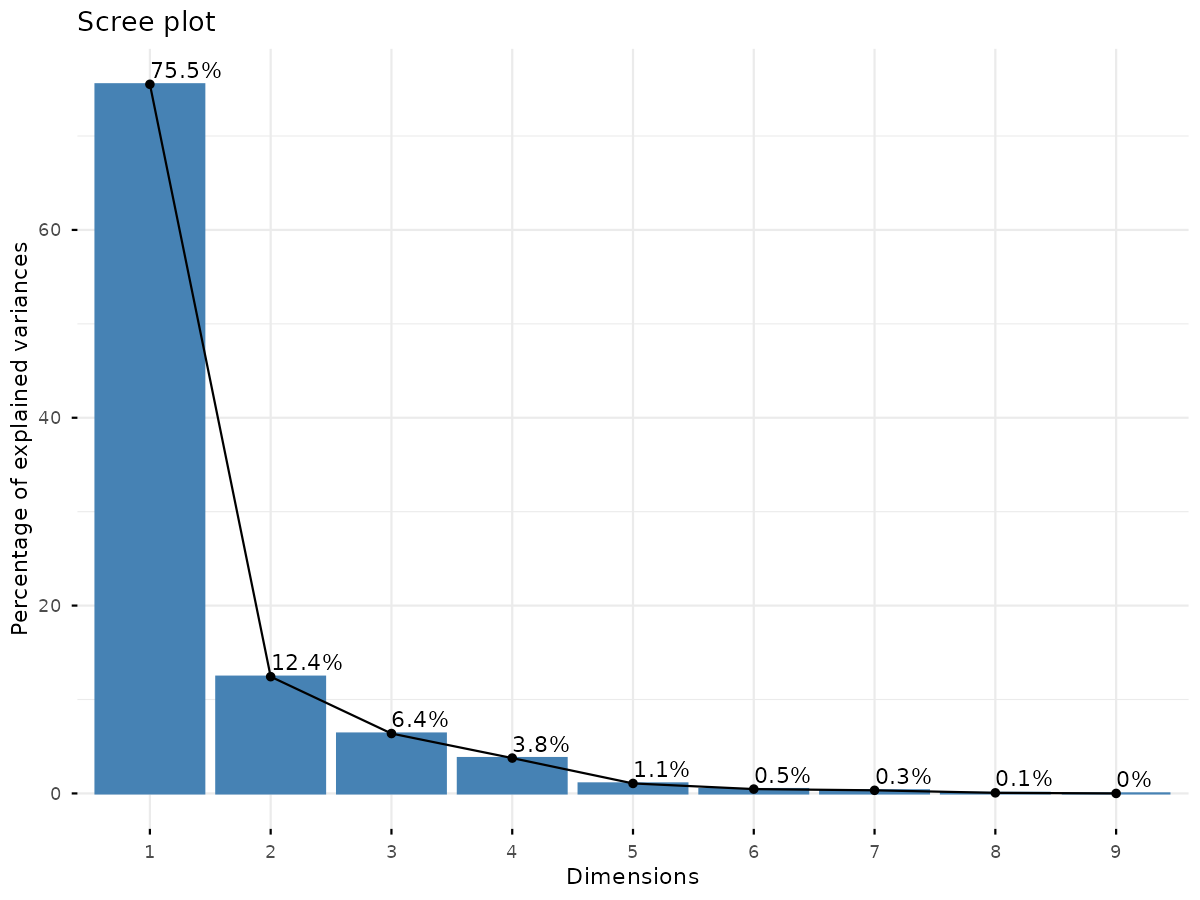

In [11]:
# Scree plot - using IRdisplay for proper text rendering
library(IRdisplay)

# Create and display scree plot
p <- fviz_screeplot(data.pca, addlabels = TRUE)

# Save to temp file and display
tmp <- tempfile(fileext = ".png")
ggsave(tmp, plot = p, width = 8, height = 6, dpi = 150)
display_png(file = tmp)

### 📊 DETAILED INTERPRETATION GUIDE: How to Read the Scree Plot

The scree plot is your **visual decision tool** for choosing how many principal components to keep. The name comes from geology - "scree" is the rocky debris at the base of a cliff.

---

#### Anatomy of a Scree Plot:

```
    Eigenvalue
    (% Variance)
         ^
    60%  |    *                    
         |     \                   ← STEEP "CLIFF" FACE
    40%  |      \                    (Important components)
         |       \
    20%  |        *---*             ← "ELBOW" - Decision point!
         |              \---*---*---*---*   ← FLAT "SCREE"
    5%   |                              (Less important)
         +---|---|---|---|---|---|---|---> Component Number
             1   2   3   4   5   6   7
```

---

#### The Elbow Method - Step by Step:

**Step 1: Find the steep drop**
- Look where the line falls most sharply
- This represents your most important components

**Step 2: Locate the "elbow"**  
- The elbow is where the steep drop transitions to a gradual decline
- It looks like a bent arm (hence "elbow")

**Step 3: Keep components BEFORE the elbow**
```
         │* 
         │ \
         │  \
         │   *  ← ELBOW is here (Component 2)
         │    \_____*____*____*
         │
         └──────────────────────
            1   2   3   4   5
            
DECISION: Keep components 1 and 2 (before the elbow)
```

---

#### Reading the Actual Values:

In your scree plot from `fviz_screeplot()`, you'll see:

| Element | What It Shows |
|---------|--------------|
| **X-axis** | Dimension number (Dim1, Dim2, Dim3...) |
| **Y-axis** | Percentage of variance explained |
| **Bars/Points** | Height = variance explained by that component |
| **Labels on bars** | Exact percentage value |

---

#### Three Decision Rules (Use Together):

```
┌─────────────────────────────────────────────────────────────┐
│                  COMPONENT SELECTION RULES                   │
├─────────────────────────────────────────────────────────────┤
│                                                              │
│  RULE 1: ELBOW METHOD                                       │
│  ─────────────────────                                      │
│  Stop at the "elbow" where curve bends                      │
│                                                              │
│  RULE 2: KAISER CRITERION                                   │
│  ────────────────────────                                   │
│  Keep components with eigenvalue > 1                        │
│  (or variance > 100%/p where p = number of variables)       │
│                                                              │
│  RULE 3: CUMULATIVE VARIANCE                                │
│  ──────────────────────────                                 │
│  Keep enough components to explain 70-90% total variance    │
│                                                              │
│  BEST PRACTICE: Apply ALL THREE and use judgment            │
│                                                              │
└─────────────────────────────────────────────────────────────┘
```

---

#### Example Interpretation:

**What the scree plot shows:**
```
Dim1: 45.2%  [████████████████████████]
Dim2: 22.1%  [███████████]
Dim3: 11.4%  [██████]
Dim4:  7.2%  [████]
Dim5:  5.1%  [███]
Dim6:  4.0%  [██]
Dim7:  3.0%  [██]
...
```

**How to interpret:**
1. **Find the elbow**: Between Dim2 and Dim3 (line starts to flatten)
2. **Cumulative check**: Dim1+Dim2 = 67.3%, Dim1+Dim2+Dim3 = 78.7%
3. **Decision**: Keep **2 or 3 components**
   - 2 components: Simpler, but only 67% variance
   - 3 components: 79% variance, still interpretable

---

#### Common Scree Plot Patterns:

**Pattern A: Clear Elbow**
```
    *
     \___*___*___*
```
DECISION: Easy! Keep components before elbow.

**Pattern B: Gradual Decline**
```
    *
      *
        *
          *
            *
```
DECISION: No clear elbow. Use Kaiser criterion or cumulative variance.

**Pattern C: Multiple Elbows**
```
    *
     \
      *___
          \
           *___*___*
```
DECISION: Use business judgment. Consider both potential elbow points.

**Pattern D: All Important**
```
    *   *   *   *   *
```
DECISION: Variables are not highly correlated. PCA may not be useful here.

---

#### Why Each Pattern Matters for Business:

| Pattern | Business Implication |
|---------|---------------------|
| **Clear elbow (2-3 PCs)** | Great! Data has clear underlying structure. Easy to communicate. |
| **Gradual decline** | Data is complex. May need more PCs or different approach. |
| **Multiple elbows** | Multiple levels of structure. Consider hierarchical analysis. |
| **Flat (all similar)** | Variables are relatively independent. PCA adds little value. |

---

#### Connecting Scree Plot to Summary Output:

```
SCREE PLOT:                          SUMMARY OUTPUT:
                                     Cumulative Proportion
    *                                Comp.1: 0.452
     \                               Comp.2: 0.673  ← 67.3%
      *___                           Comp.3: 0.787  ← 78.7%
          \___*___*                  Comp.4: 0.859
                                     Comp.5: 0.910  ← First to hit 90%
                                     
SCREE says: Elbow at 2-3         CUMULATIVE says: 3 for 79%, 5 for 90%
```

---

#### Quick Reference:

```
• Y-axis = Variance explained (eigenvalue or %)
• Look for the BEND in the curve
• Steep section = Important components (KEEP these)
• Flat section = Noise (DON'T need these)
• When in doubt: Use cumulative variance target (80%)
```

### Biplot: Visualizing Variable Relationships

**The Power of Visual Analytics**

A **biplot** is one of the most powerful visualization tools in multivariate analysis. It displays:
- **Variables as arrows (vectors)** pointing in the direction they influence the components
- **The relationship between variables** based on arrow angles and positions

**How to Interpret a Biplot:**

| Arrow Pattern | Interpretation |
|--------------|----------------|
| Arrows pointing same direction | Positively correlated variables |
| Arrows pointing opposite directions | Negatively correlated variables |
| Arrows at 90° angles | Uncorrelated (independent) variables |
| Long arrows | Variable is well-represented by these components |
| Short arrows | Variable poorly captured—might need more components |

**Business Insight Example:**
If "Customer Satisfaction," "Brand Loyalty," and "Repeat Purchases" arrows cluster together pointing the same direction, this confirms these metrics move together—improving one likely improves all three!

**Strategic Value:**
Biplots enable executives to **see** complex data relationships at a glance, facilitating faster and more intuitive decision-making.

**R Function:** `fviz_pca_var()` creates variable biplots with customizable colors and labels

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the ggpubr package.
  Please report the issue at <https://github.com/kassambara/ggpubr/issues>.”


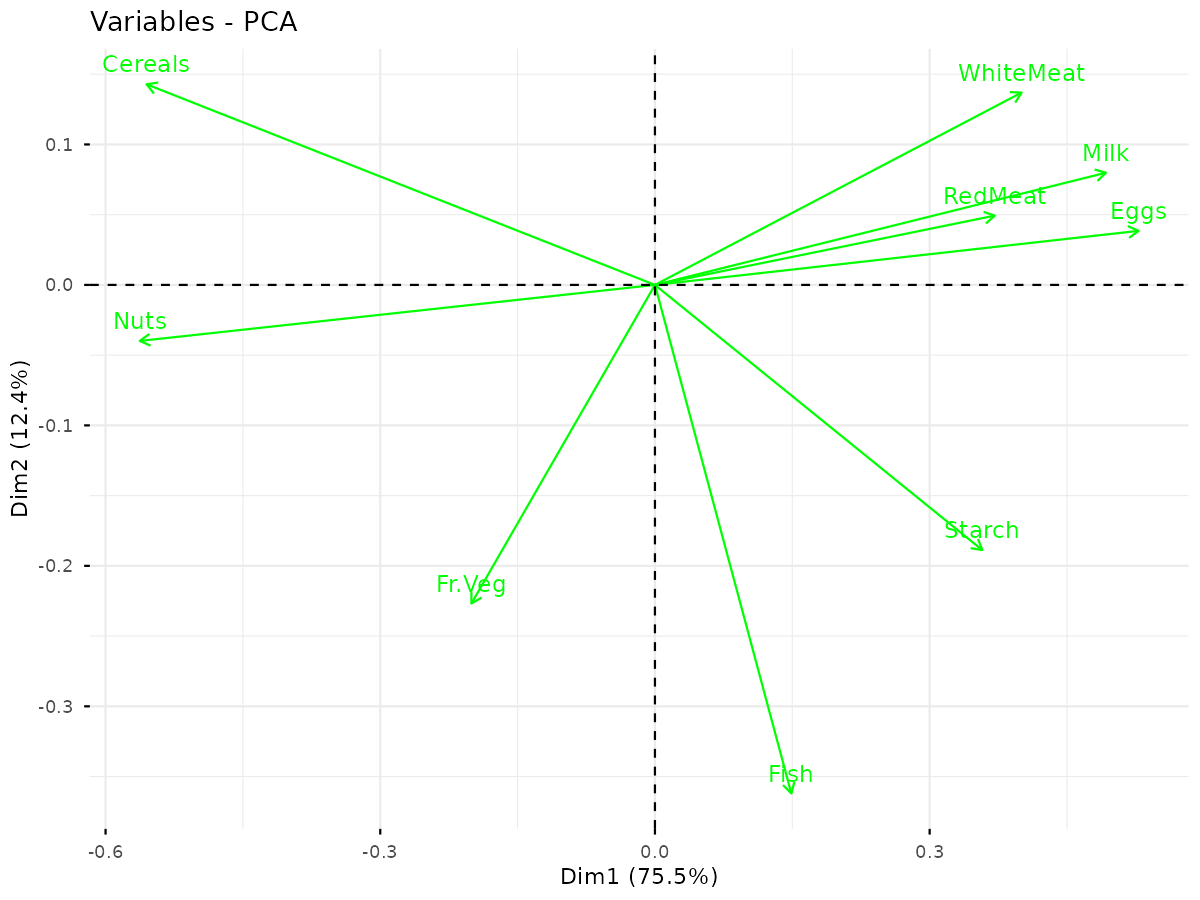

In [12]:
# Biplot - using IRdisplay for proper text rendering
p <- fviz_pca_var(data.pca, col.var = "green")

# Insight 1: Variables grouped together are positively correlated
#            (e.g., white/red meat, milk, and eggs)
#
# Insight 2: Higher distance from origin = better represented variable
#            (eggs, milk, white meat have higher magnitude than red meat)

tmp <- tempfile(fileext = ".png")
ggsave(tmp, plot = p, width = 8, height = 6, dpi = 150)
display_png(file = tmp)

### 📊 DETAILED INTERPRETATION GUIDE: How to Read the PCA Biplot

The biplot is one of the most powerful visualizations in multivariate analysis. It shows **variable relationships** in a 2D space, making abstract correlations visually intuitive.

---

#### Anatomy of a Biplot:

```
                            Dim2 (18.4%)
                                 ^
                                 |
                         Fish ←──┼──────────→ RedMeat
                        /        |        \
                    Fr.Veg       |         WhiteMeat
                                 |              \
                    ←────────────┼────────────────→ Dim1 (45.2%)
                                 |              /
                    Cereals      |         Milk
                        \        |        /
                         Nuts ←──┼──────────→ Eggs
                                 |
                                 v
```

---

#### What Each Element Means:

| Element | Representation | How to Read It |
|---------|---------------|----------------|
| **Arrows (vectors)** | Variables | Direction shows how variable relates to PCs |
| **Arrow LENGTH** | Quality of representation | Longer = better represented by these 2 PCs |
| **Arrow DIRECTION** | Loading direction | Where it points = positive direction of that variable |
| **Arrow ANGLES** | Variable correlations | Small angle = high positive correlation |
| **Origin (center)** | Mean of all variables | Zero point for all standardized variables |
| **Axis labels** | PC names with % variance | "Dim1 (45.2%)" means PC1 explains 45.2% |

---

#### Interpreting Arrow Angles:

```
ANGLE BETWEEN ARROWS → CORRELATION BETWEEN VARIABLES

    0° (Same direction)     → Strong POSITIVE correlation (r ≈ +1)
    
    Variable A ────→
    Variable B ────→
    
    
    90° (Perpendicular)     → NO correlation (r ≈ 0)
    
    Variable A ────→
                   |
                   v Variable B
    
    
    180° (Opposite)         → Strong NEGATIVE correlation (r ≈ -1)
    
    ←──── Variable A        Variable B ────→
```

---

#### Step-by-Step Interpretation:

**Step 1: Identify clusters of arrows**
```
Look for arrows pointing in similar directions:

    Cluster 1 (upper right):         Cluster 2 (lower left):
    • RedMeat ────→                  ←──── Cereals
    • WhiteMeat ────→                ←──── Nuts  
    • Eggs ────→                     ←──── Fr.Veg
    • Milk ────→
    
These variable clusters move TOGETHER within each cluster
but OPPOSITE between clusters
```

**Step 2: Interpret each axis**
```
DIM 1 (Horizontal):
• RIGHT: Animal proteins (positive loadings)
• LEFT: Plant foods (negative loadings)
→ Dim1 = "Animal vs. Plant Protein" dimension

DIM 2 (Vertical):  
• TOP: Coastal foods (Fish, Fr.Veg)
• BOTTOM: Staples (Cereals, Starch)
→ Dim2 = "Coastal vs. Inland Diet" dimension
```

**Step 3: Check arrow lengths**
```
LONG arrows (well-represented):       SHORT arrows (poorly represented):
• Eggs (very long)                   • Starch (short)
• Cereals (very long)                • Fish (medium)
• Milk (very long)

Variables with SHORT arrows may need more components to be
properly captured - consider if you should add PC3
```

**Step 4: Look at the overall picture**
```
QUADRANT ANALYSIS:
                    │
    Coastal + Plant │ Coastal + Animal
    (e.g., Fish,    │ (e.g., WhiteMeat
     Vegetables)    │  from coastal areas)
    ────────────────┼────────────────
    Inland + Plant  │ Inland + Animal
    (e.g., Cereals, │ (e.g., RedMeat,
     Nuts)          │  Eggs, Milk)
                    │
```

---

#### Business Biplot Example - Customer Survey:

```
                         Dim2: Value Dimension
                              ^
                              |
                    Price ←───┼────→ Speed
                   Value     │     Convenience
                              |
            ←─────────────────┼─────────────────→ Dim1: Quality
                              |
                   Loyalty ←──┼────→ Quality
                              |     Design
                              v

INTERPRETATION:
• Quality and Design cluster together (product-focused customers)
• Price and Value oppose Quality (value-focused customers)  
• Speed and Convenience form separate cluster (time-focused customers)
• Loyalty sits between Quality and Value (satisfied customers balance both)
```

---

#### Reading Arrow Length (Cos² Preview):

| Arrow Length | Cos² Value | Interpretation |
|--------------|------------|----------------|
| **Very long** | > 0.7 | Variable is WELL represented by PC1+PC2 |
| **Medium** | 0.4 - 0.7 | Variable is MODERATELY represented |
| **Short** | < 0.4 | Variable is POORLY represented - may need PC3 |

---

#### Common Mistakes When Reading Biplots:

| Mistake | Why It's Wrong | Correct Approach |
|---------|----------------|------------------|
| Only looking at arrow tips | Missing angle information | Compare arrow directions from origin |
| Ignoring short arrows | Missing important info | Note which variables need more PCs |
| Reading exact distances | Biplot distorts distances | Only interpret relative positions and angles |
| Forgetting axes meaning | Missing context | Always note what % variance each axis shows |

---

#### Quick Reference Card:

```
┌─────────────────────────────────────────────────────────┐
│               BIPLOT QUICK REFERENCE                     │
├─────────────────────────────────────────────────────────┤
│ ARROWS = Variables                                       │
│ DIRECTION = How variable relates to PC axes             │
│ LENGTH = How well variable is represented               │
│ ANGLE between arrows = Correlation between variables    │
│                                                          │
│ Same direction → Positive correlation                   │
│ Opposite direction → Negative correlation               │
│ Perpendicular → No correlation                          │
│                                                          │
│ CLUSTERS of arrows = Variables that move together       │
│ QUADRANTS = Different combinations of PC dimensions     │
└─────────────────────────────────────────────────────────┘
```

### Cos2: Measuring Variable Representation Quality

**How Well Is Each Variable Captured?**

The **Cos² (squared cosine)** metric measures how well each variable is represented by the selected principal components. Think of it as a "representation quality score."

**Mathematical Interpretation:**
- Cos² values range from 0 to 1
- **Cos² = 1:** Variable is perfectly represented by these components
- **Cos² = 0:** Variable is not captured at all
- **Cos² > 0.5:** Good representation
- **Cos² < 0.3:** Poor representation (consider adding more components)

**Why This Matters in Business Analytics:**

Imagine you're analyzing customer satisfaction with 10 survey questions:
- If Cos² for "Price Satisfaction" is low (0.2), your 2-component solution doesn't capture pricing concerns well
- You might need a 3rd component OR acknowledge that price perception is independent of other satisfaction factors

**Decision Implications:**
Variables with low Cos² either:
1. Need additional components to capture them
2. Represent unique dimensions that can't be reduced
3. May require separate analysis

**R Function:** `fviz_cos2()` creates bar charts showing representation quality for each variable

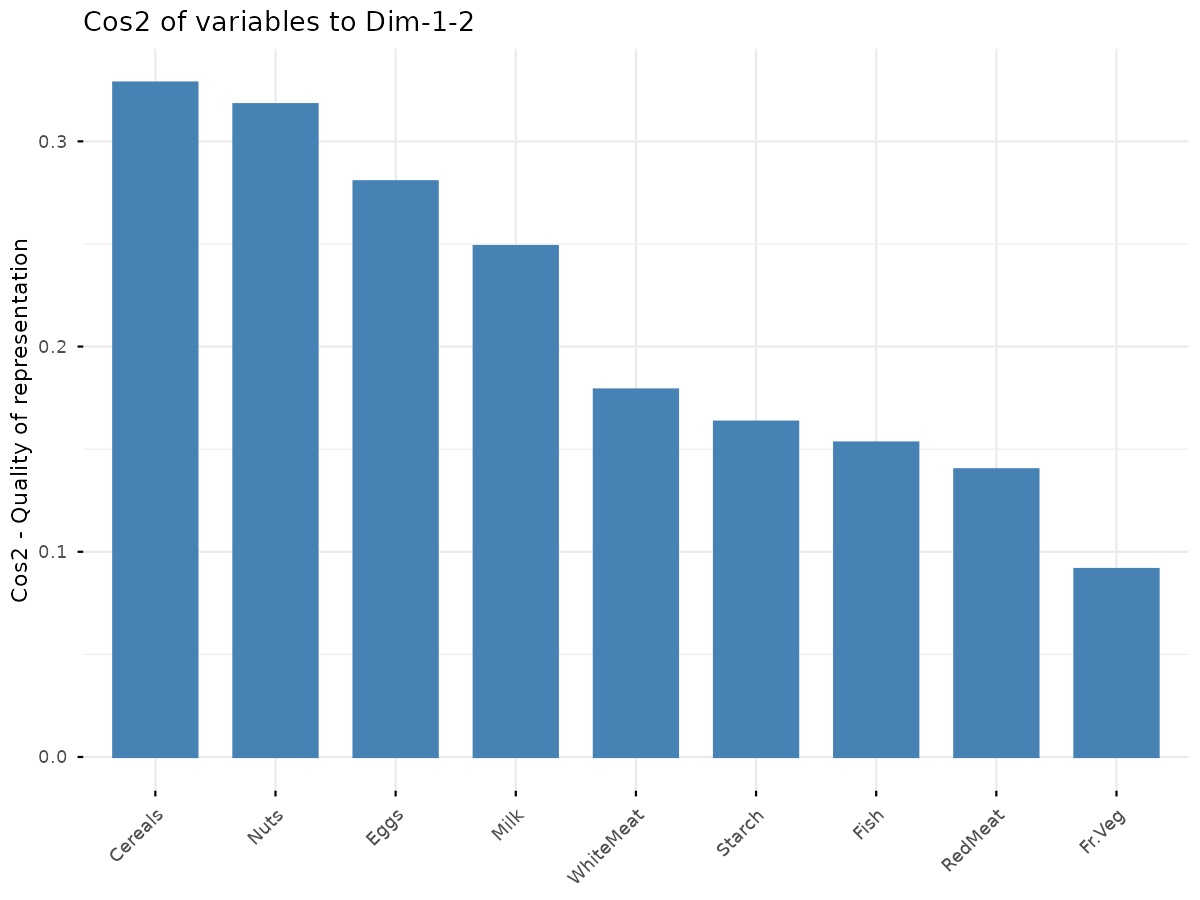

In [13]:
# Cos2 visualization - using IRdisplay for proper text rendering
p <- fviz_cos2(data.pca, choice = "var", axes = 1:2)

# Low value = variable not perfectly represented by that component
# High value = good representation of the variable on that component
#
# Insight: Cereals, pulse nut oilseeds, eggs, and milk have highest cos2,
#          hence contributing the most to PC1 and PC2

tmp <- tempfile(fileext = ".png")
ggsave(tmp, plot = p, width = 8, height = 6, dpi = 150)
display_png(file = tmp)

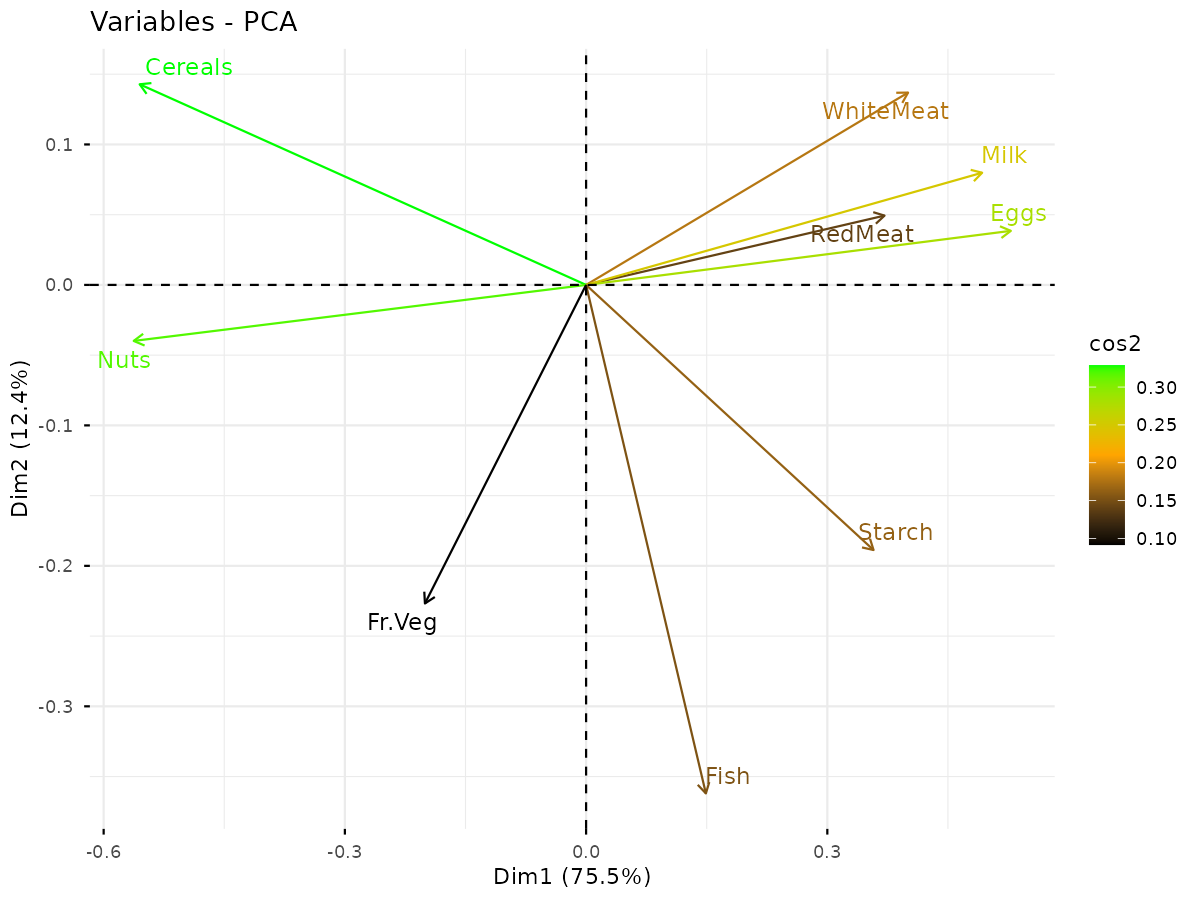

In [14]:
# Biplot combined with cos2 - using IRdisplay for proper text rendering
p <- fviz_pca_var(data.pca, col.var = "cos2",
             gradient.cols = c("black", "orange", "green"),
             repel = TRUE)

# High cos2 = green: Cereals, pulses, oilseeds, eggs, and milk
# Mid cos2 = orange: white meat, starchy food, fish, and red meat
# Low cos2 = black: fruits and vegetables

tmp <- tempfile(fileext = ".png")
ggsave(tmp, plot = p, width = 8, height = 6, dpi = 150)
display_png(file = tmp)

### 📊 DETAILED INTERPRETATION GUIDE: Cos² Bar Chart and Color-Coded Biplot

The Cos² (cosine squared) metric tells you **how well each variable is represented** by your selected principal components. Think of it as a "representation quality score."

---

#### Understanding the Cos² Bar Chart:

```
Cos² of variables on Dim-1-2
                                                        
Eggs          ████████████████████████████████  0.85
Cereals       ██████████████████████████████    0.82
Milk          █████████████████████████████     0.78
Nuts          ████████████████████████          0.65
WhiteMeat     ██████████████████████            0.58
RedMeat       █████████████████                 0.45
Fish          ███████████████                   0.42
Starch        ██████████                        0.32
Fr.Veg        ████████                          0.28
              ├───────────────────────────────────┤
              0                                  1.0
```

---

#### What Cos² Values Mean:

| Cos² Range | Bar Length | Interpretation | Action Needed |
|------------|------------|----------------|---------------|
| **0.8 - 1.0** | Very long | EXCELLENT representation | Trust this variable's position in biplot |
| **0.6 - 0.8** | Long | GOOD representation | Variable is well-captured |
| **0.4 - 0.6** | Medium | MODERATE representation | Position is approximate |
| **0.2 - 0.4** | Short | POOR representation | Consider adding more PCs |
| **0.0 - 0.2** | Very short | VERY POOR representation | Variable needs additional dimensions |

---

#### Mathematical Foundation:

```
Cos² = (Loading on PC1)² + (Loading on PC2)²

If using only PC1 and PC2:
• Cos² tells you what % of the variable's variance is captured
• Cos² = 0.85 means 85% of that variable's behavior is explained by PC1+PC2
• The remaining 15% would require PC3, PC4, etc. to explain
```

---

#### Interpreting the Color-Coded Biplot:

The biplot with Cos² coloring shows arrow colors based on representation quality:

```
COLOR GRADIENT:

BLACK/DARK ─────────── ORANGE ─────────── GREEN
   │                      │                  │
   │                      │                  │
 Low Cos²           Medium Cos²         High Cos²
 (< 0.4)            (0.4 - 0.6)         (> 0.6)
   │                      │                  │
 POORLY              MODERATELY          WELL
 REPRESENTED         REPRESENTED         REPRESENTED
   │                      │                  │
 Interpret          Use with           Trust these
 with caution       some care          findings
```

---

#### How to Read the Color-Coded Biplot:

**Step 1: Focus on GREEN arrows first**
- These are your most reliable findings
- Their position and direction can be trusted
- Build your main interpretation around these

**Step 2: Acknowledge ORANGE arrows**
- These are moderately well-captured
- Their general direction is correct
- But exact position may shift with more components

**Step 3: Note BLACK arrows carefully**
- These variables are NOT well-represented
- Their position in the 2D plot is misleading
- You may need PC3+ to understand these variables

---

#### Example Interpretation:

```
Biplot with Cos² colors:

         Dim2
          ^
          |
   Fish ──┼────────→ Eggs (GREEN)
  (ORANGE)|          Milk (GREEN)
          |        /
          ├───────/────────→ Dim1
          |      /
Fr.Veg ───┼─────/──→ WhiteMeat (ORANGE)
(BLACK)   |    
          |
          v

INTERPRETATION:
✓ TRUST: Eggs and Milk positions (GREEN) - well-represented
⚠ MODERATE: Fish and WhiteMeat (ORANGE) - directionally correct
✗ CAUTION: Fr.Veg (BLACK) - position may be misleading
```

---

#### Decision Framework:

```
┌─────────────────────────────────────────────────────────────┐
│           WHEN TO ADD MORE COMPONENTS                        │
├─────────────────────────────────────────────────────────────┤
│                                                              │
│  IF important variables have low Cos² (< 0.4):              │
│                                                              │
│  OPTION 1: Add PC3 (and re-calculate Cos² for PC1+PC2+PC3)  │
│            → Variable should now be better represented       │
│                                                              │
│  OPTION 2: Accept that this variable is "unique"            │
│            → It represents a dimension not captured by PCA  │
│            → May need separate analysis for this variable   │
│                                                              │
│  OPTION 3: Check if variable is important for your goal     │
│            → If not critical, proceed with 2 components     │
│            → If critical, definitely add more components    │
│                                                              │
└─────────────────────────────────────────────────────────────┘
```

---

#### Business Application Example:

**Customer Survey PCA Results:**

| Variable | Cos² (PC1+PC2) | Color | Business Decision |
|----------|----------------|-------|-------------------|
| Quality | 0.88 | Green | ✓ Use in segmentation |
| Price | 0.75 | Green | ✓ Use in segmentation |
| Design | 0.62 | Orange | ✓ Use with caution |
| Service | 0.41 | Orange | ⚠ Consider adding PC3 |
| Location | 0.22 | Black | ✗ Analyze separately |
| Loyalty | 0.18 | Black | ✗ Analyze separately |

**Business Insight:**
"Our 2-component customer map reliably captures Product (Quality, Design) and Price perceptions. However, Service and Location satisfaction are NOT well-captured—we need separate analysis to understand these dimensions."

---

#### Quick Reference:

```
┌────────────────────────────────────────────────────────┐
│              COS² INTERPRETATION GUIDE                  │
├────────────────────────────────────────────────────────┤
│                                                         │
│  Cos² = How much of variable's variance is explained   │
│         by your selected components (PC1 + PC2)        │
│                                                         │
│  HIGH Cos² (GREEN) → TRUST the biplot position         │
│  MID Cos² (ORANGE) → MODERATE confidence               │
│  LOW Cos² (BLACK)  → DON'T TRUST - needs more PCs      │
│                                                         │
│  Bar chart: Compare all variables at once              │
│  Colored biplot: See quality + position together       │
│                                                         │
└────────────────────────────────────────────────────────┘
```

### Combined Biplot with Cos² Color Gradient

**Integrating Multiple Insights in One Visualization**

This enhanced biplot uses color to show Cos² values, providing two insights simultaneously:
- **Arrow direction/length:** Variable relationships and importance
- **Color intensity:** How well each variable is represented

**Color Interpretation:**
- **Green (high Cos²):** Well-represented variables—these are your "headline findings"
- **Orange (medium Cos²):** Moderately represented—interpret with some caution
- **Black (low Cos²):** Poorly represented—may need separate analysis

**Business Communication Tip:**
When presenting PCA results to stakeholders:
1. Focus on green (well-represented) variables for main conclusions
2. Acknowledge orange variables as "supporting evidence"
3. Note that black variables require additional investigation

This visualization is ideal for **executive presentations** where you need to convey complex statistical results in an accessible format.

---

## In-Class Exercise: PCA on Instructor Behavior Data

### Applying PCA to Educational Research

This dataset is from UCLA Advanced Research Computing and captures student evaluations of instructor behavior. This is a classic application of PCA in **survey research**—reducing many Likert-scale items into meaningful behavioral dimensions.

**The Business Analytics Parallel:**
Just as we analyze instructor effectiveness, companies regularly survey:
- Employee engagement (20+ questions → 3-4 engagement dimensions)
- Customer satisfaction (15+ touchpoints → key satisfaction drivers)
- Brand perception (multiple attributes → brand positioning dimensions)

**Variables to Analyze (ITEM13-ITEM24):**

| Variable | Description | Potential Dimension |
|----------|-------------|---------------------|
| ITEM13 | Instructor Well Prepared | Teaching Competence |
| ITEM14 | Instructor Scholarly Grasp | Teaching Competence |
| ITEM15 | Instructor Confidence | Teaching Competence |
| ITEM16 | Instructor Focus Lectures | Teaching Competence |
| ITEM17 | Uses Clear Relevant Examples | Communication |
| ITEM18 | Sensitive to Students | Student Engagement |
| ITEM19 | Allows Questions | Student Engagement |
| ITEM20 | Accessible Outside Class | Student Engagement |
| ITEM21 | Aware of Understanding | Student Engagement |
| ITEM22 | Satisfied with Evaluation | Overall Satisfaction |
| ITEM23 | Compared to Other Instructors | Overall Satisfaction |
| ITEM24 | Compared to Other Courses | Overall Satisfaction |

**Goal:** Reduce these 12 items into 2-3 meaningful components that capture the essence of "effective teaching."

In [15]:
# Load Instructor Behavior Data
instructor_data <- read.csv("/workspaces/MS3313_base_template/data/module_3/PCA_Instructor Behavior Data.csv", header = TRUE)

# View structure
str(instructor_data)
head(instructor_data)

'data.frame':	1428 obs. of  67 variables:
 $ FACSEX  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ FACETHN : int  1 1 1 1 1 1 1 1 1 1 ...
 $ FACNAT  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ FACRANK : int  1 1 1 1 1 1 1 1 1 1 ...
 $ EMPLOYM : int  25 25 25 25 25 25 25 25 25 25 ...
 $ SALARY  : int  24 24 24 24 24 24 24 24 24 24 ...
 $ YRSTEACH: int  NA NA NA NA NA NA NA NA NA NA ...
 $ YRSUT   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ DEGREE  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ SAMPLE  : int  2 2 2 2 2 2 2 2 2 2 ...
 $ REMIND  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ NSTUD   : int  23 23 23 23 23 23 23 23 23 23 ...
 $ STUDRANK: int  4 4 4 4 4 4 4 4 3 3 ...
 $ STUDSEX : int  1 2 1 2 2 2 2 1 2 2 ...
 $ GRADE   : int  4 4 4 4 5 4 4 4 4 4 ...
 $ GPA     : int  4 4 3 3 3 3 5 3 5 3 ...
 $ SATISFY : int  3 1 1 3 1 1 3 1 5 1 ...
 $ RELIGION: int  3 3 3 3 5 3 3 3 3 3 ...
 $ PSD     : int  4 2 4 2 2 3 5 4 3 3 ...
 $ ITEM13  : int  5 5 5 4 5 5 5 5 5 5 ...
 $ ITEM14  : int  5 4 4 4 5 5 5 5 5 4 ...
 $ ITEM15  : int  5 4 5 4 4 4 5 4 5 

,FACSEX,FACETHN,FACNAT,FACRANK,EMPLOYM,SALARY,YRSTEACH,YRSUT,DEGREE,SAMPLE,⋯,ITEM51,ITEM52,RACE,SEXISM,RACISM,RPOLICY,CASTEMAN,COMPETEN,SENSITIV,CSTATUS
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,1,25,24,NA,0,1,2,⋯,3,2,1,2.461538,2.125,2.5,3.5,5.0,4.6,7.03
2,1,1,1,1,25,24,NA,0,1,2,⋯,1,2,1,1.692308,1.500,2.0,1.0,4.4,3.6,7.03
3,1,1,1,1,25,24,NA,0,1,2,⋯,3,2,1,2.769231,2.625,3.5,4.5,4.8,4.4,7.03
4,1,1,1,1,25,24,NA,0,1,2,⋯,1,1,1,1.538462,1.500,2.0,1.0,4.0,3.6,7.03
5,1,1,1,1,25,24,NA,0,1,2,⋯,1,1,1,1.384615,1.375,1.5,1.5,4.6,4.8,7.03
6,1,1,1,1,25,24,NA,0,1,2,⋯,1,1,1,1.615385,1.000,2.0,1.0,4.6,4.4,7.03


In [16]:
# Select only ITEM13 to ITEM24 columns for PCA
pca_items <- instructor_data[, c("ITEM13", "ITEM14", "ITEM15", "ITEM16", "ITEM17", 
                                  "ITEM18", "ITEM19", "ITEM20", "ITEM21", "ITEM22", 
                                  "ITEM23", "ITEM24")]

# Check for missing values
colSums(is.na(pca_items))

# Remove rows with missing values if any
pca_items_clean <- na.omit(pca_items)
cat("Original rows:", nrow(pca_items), "\nAfter removing NA:", nrow(pca_items_clean))

ITEM13 ITEM14 ITEM15 ITEM16 ITEM17 ITEM18 ITEM19 ITEM20 ITEM21 ITEM22 ITEM23 
     9      4      4      8      5      4      8     32      6     14      5 
ITEM24 
    11

Original rows: 1428 
After removing NA: 1365

,ITEM13,ITEM14,ITEM15,ITEM16,ITEM17,ITEM18,ITEM19,ITEM20,ITEM21,ITEM22,ITEM23,ITEM24
1,0.7374111,0.6781698,0.7574555,0.8677451,0.9323335,1.0336969,0.95778924,-0.8543727,1.2456638,1.2482274,0.1951958,-0.7191301
2,0.7374111,-0.7503823,-0.6083658,-0.3384382,0.9323335,-0.8991747,-0.07981577,-0.8543727,0.2293272,0.3524175,0.1951958,-0.7191301
3,0.7374111,-0.7503823,0.7574555,0.8677451,0.9323335,1.0336969,0.95778924,0.2458337,0.2293272,0.3524175,0.1951958,0.3607518
4,-0.6339324,-0.7503823,-0.6083658,-0.3384382,-0.1849933,-1.8656105,-0.07981577,0.2458337,0.2293272,0.3524175,-0.8496758,-0.7191301
5,0.7374111,0.6781698,-0.6083658,0.8677451,-0.1849933,1.0336969,0.95778924,1.3460401,0.2293272,1.2482274,1.2400674,0.3607518
6,0.7374111,0.6781698,-0.6083658,-0.3384382,0.9323335,1.0336969,-0.07981577,1.3460401,0.2293272,0.3524175,1.2400674,1.4406337


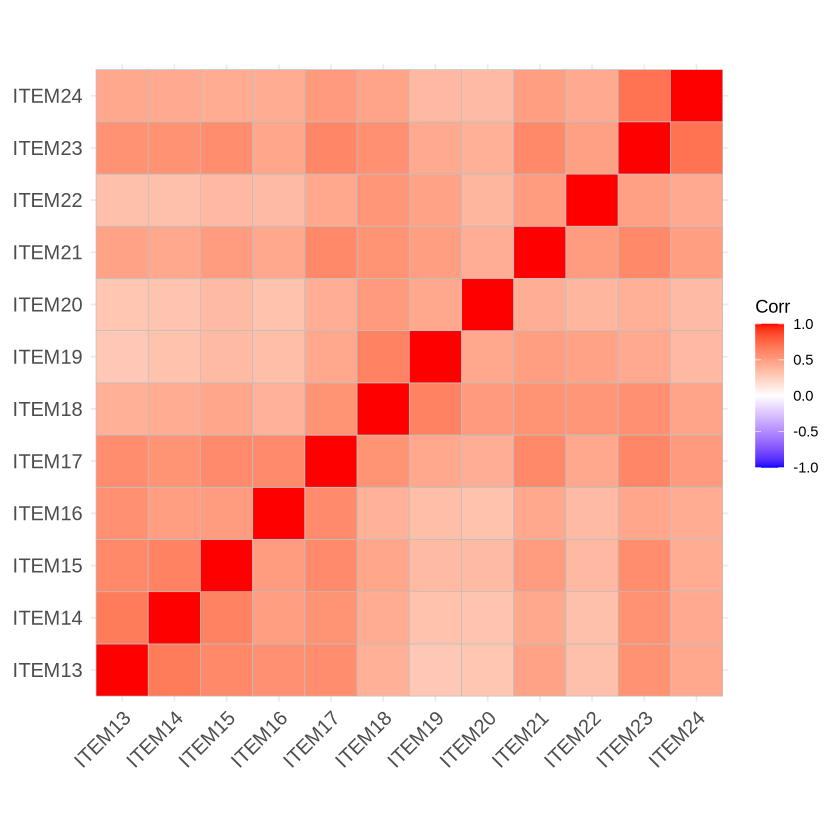

In [17]:
# Step 1: Data Normalization
instructor_normalized <- scale(pca_items_clean)
head(instructor_normalized)

# Step 2: Correlation Matrix
instructor_corr <- cor(instructor_normalized)
ggcorrplot(instructor_corr)

In [18]:
# Step 3: Perform PCA
instructor.pca <- princomp(instructor_corr)
summary(instructor.pca)

# View loadings for first three components
instructor.pca$loadings[, 1:3]

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     0.3633841 0.2236385 0.17888754 0.17375918 0.15597966
Proportion of Variance 0.3904301 0.1478783 0.09461753 0.08927029 0.07193618
Cumulative Proportion  0.3904301 0.5383085 0.63292599 0.72219629 0.79413247
                          Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     0.1404041 0.11895374 0.11189413 0.09530486 0.09161962
Proportion of Variance 0.0582869 0.04183769 0.03701912 0.02685601 0.02481923
Cumulative Proportion  0.8524194 0.89425705 0.93127617 0.95813218 0.98295141
                          Comp.11 Comp.12
Standard deviation     0.07593439       0
Proportion of Variance 0.01704859       0
Cumulative Proportion  1.00000000       1

,Comp.1,Comp.2,Comp.3
ITEM13,0.45426502,0.05384755,0.0485610
ITEM14,0.41770893,0.06497049,0.0421686
ITEM15,0.33916850,0.01980651,0.1606123
ITEM16,0.29397285,0.17581423,0.2116906
ITEM17,0.18056143,-0.15959638,0.2773977
ITEM18,-0.23958588,-0.16005214,0.2674393
ITEM19,-0.37948422,-0.02860440,0.4353973
ITEM20,-0.30178394,0.31808308,-0.4692640
ITEM21,-0.03041679,-0.31302432,0.3044787
ITEM22,-0.26053848,-0.27681504,0.2059083


Warning message in geom_bar(stat = "identity", fill = barfill, color = barcolor, :
“Ignoring empty aesthetic: `width`.”


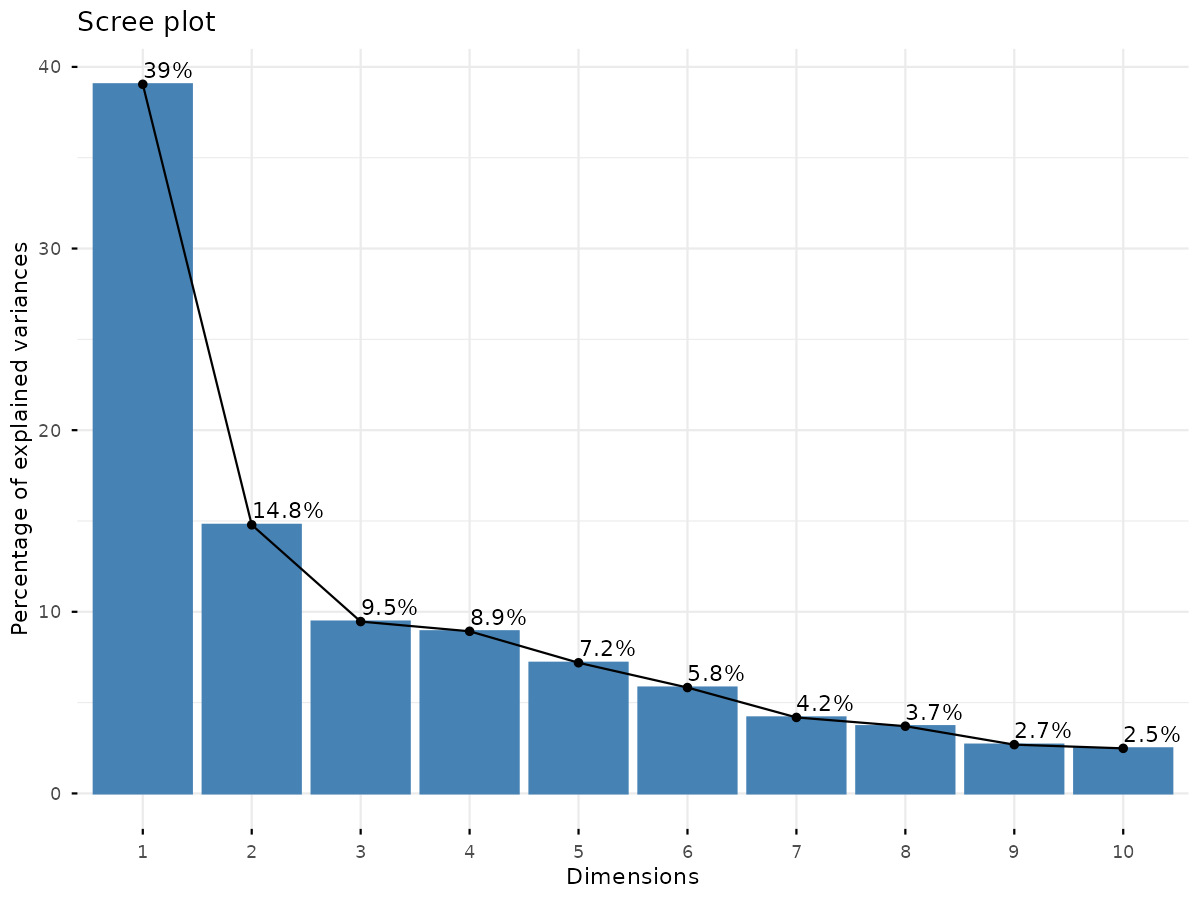

In [19]:
# Scree Plot - using IRdisplay for proper text rendering
p <- fviz_screeplot(instructor.pca, addlabels = TRUE)

tmp <- tempfile(fileext = ".png")
ggsave(tmp, plot = p, width = 8, height = 6, dpi = 150)
display_png(file = tmp)

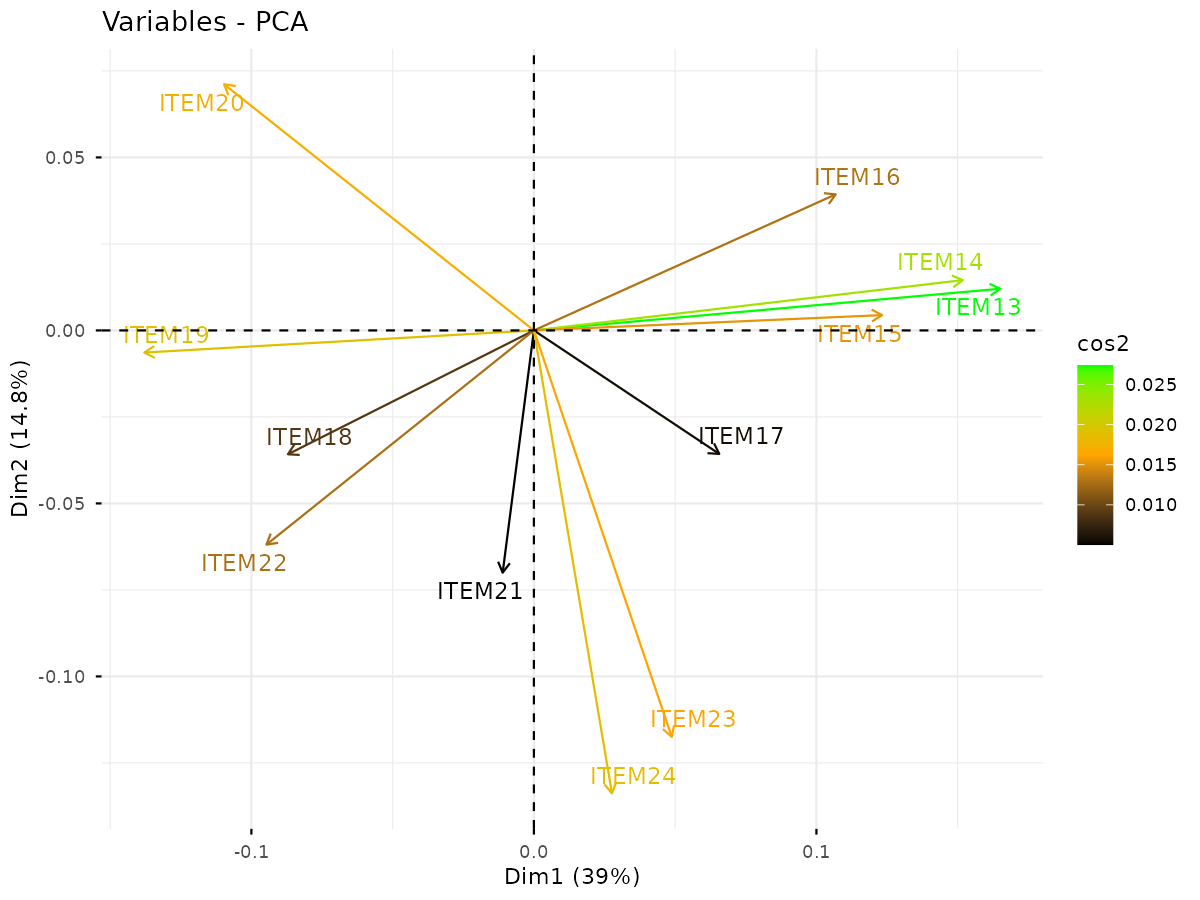

In [20]:
# Biplot - using IRdisplay for proper text rendering
p <- fviz_pca_var(instructor.pca, col.var = "cos2",
             gradient.cols = c("black", "orange", "green"),
             repel = TRUE)

tmp <- tempfile(fileext = ".png")
ggsave(tmp, plot = p, width = 8, height = 6, dpi = 150)
display_png(file = tmp)

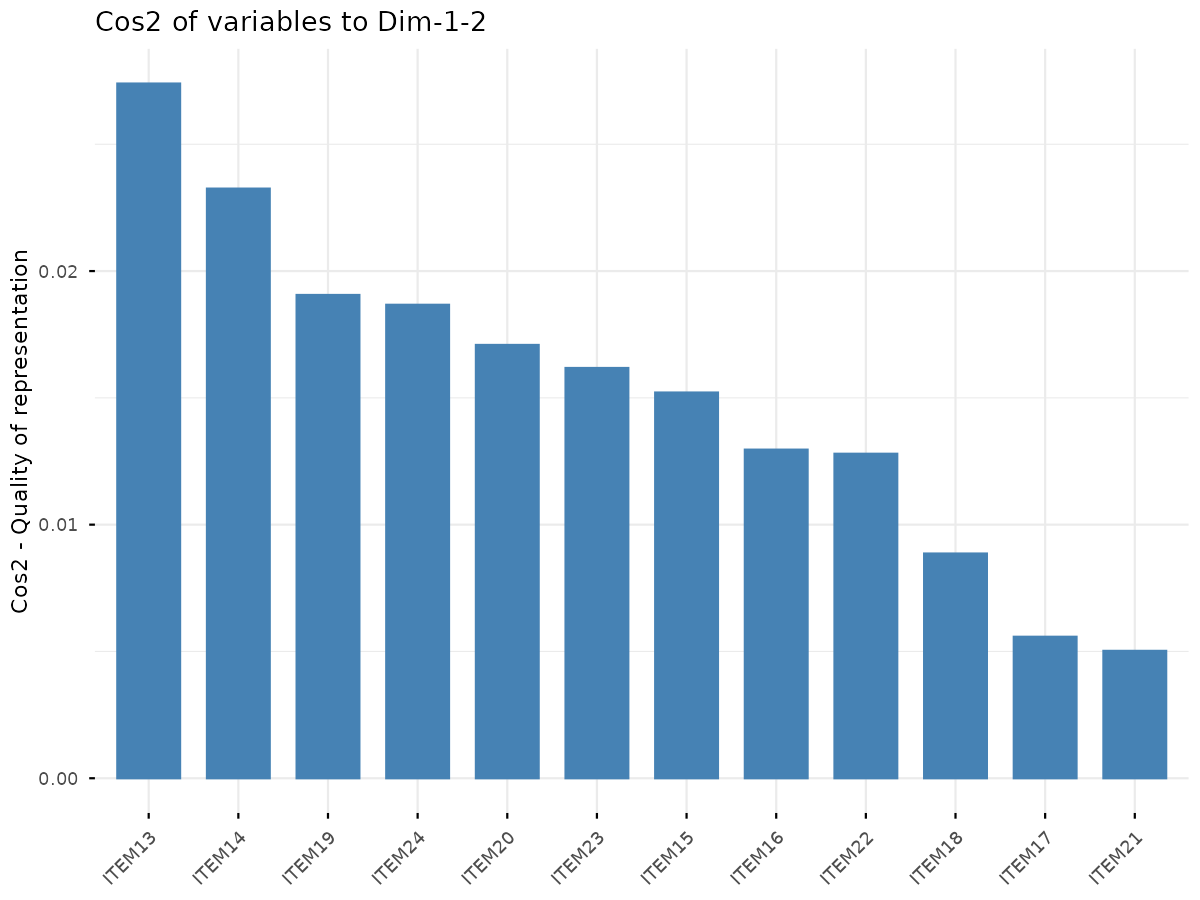

In [21]:
# Cos2 visualization - using IRdisplay for proper text rendering
p <- fviz_cos2(instructor.pca, choice = "var", axes = 1:2)

tmp <- tempfile(fileext = ".png")
ggsave(tmp, plot = p, width = 8, height = 6, dpi = 150)
display_png(file = tmp)

---

## Principal Component Regression (PCR)

### Solving the Multicollinearity Problem in Predictive Modeling

**The Challenge PCR Addresses:**

In business forecasting, we often have many potential predictors that are correlated with each other:
- Marketing mix variables (TV, radio, digital, print spending are often correlated)
- Economic indicators (GDP, unemployment, consumer confidence move together)
- Customer metrics (satisfaction, loyalty, engagement are interrelated)

When predictors are highly correlated (**multicollinearity**), standard regression produces:
- Unstable coefficient estimates
- Inflated standard errors
- Unreliable predictions

**The PCR Solution:**

PCR combines PCA with linear regression in two steps:
1. **PCA Step:** Transform correlated predictors into uncorrelated principal components
2. **Regression Step:** Use the principal components as predictors instead of original variables

**Advantages:**
- Eliminates multicollinearity completely (PCs are orthogonal by definition)
- Reduces model complexity
- Often improves prediction accuracy on new data

**Disadvantages:**
- Components may be harder to interpret than original variables
- Component selection doesn't consider the outcome variable
- May discard components that are actually predictive

**Business Applications:**
- Forecasting sales from multiple marketing channels
- Predicting credit risk from correlated financial indicators
- Estimating customer lifetime value from behavioral metrics

In [22]:
# Install and load pls package
# install.packages("pls")
library(pls)


Attaching package: ‘pls’


The following object is masked from ‘package:stats’:

    loadings




### Loading the PLS Package

**The `pls` Package for PCR in R**

The `pls` package provides comprehensive tools for:
- **PCR (Principal Component Regression):** Uses PCA for dimension reduction before regression
- **PLSR (Partial Least Squares Regression):** An alternative that considers Y when creating components

**Key Functions:**
- `pcr()`: Fit a PCR model
- `summary()`: View model diagnostics including variance explained
- `validationplot()`: Visualize cross-validation results
- `predict()`: Generate predictions for new data

**Important Parameters:**
- `scale = TRUE`: Standardize predictors (essential when variables have different units)
- `validation = "CV"`: Use cross-validation to assess model performance

### PCR Example: Predicting Horsepower (mtcars Dataset)

**Business Context:**

While this example uses automotive data, the principles apply directly to business forecasting:
- **Outcome (hp):** Like predicting sales revenue
- **Predictors (mpg, disp, drat, wt, qsec):** Like using correlated marketing metrics

**Why These Predictors Are Problematic for Standard Regression:**
- Engine displacement (disp) correlates with weight (wt)
- Fuel efficiency (mpg) negatively correlates with both
- Quarter-mile time (qsec) is influenced by all other factors

PCR handles these correlations by first creating orthogonal components, then regressing hp on those components.

In [23]:
# View first six rows of mtcars dataset
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [24]:
# Make this example reproducible
set.seed(1)

# Fit PCR model - predict hp using mpg, disp, drat, wt, qsec
# scale=TRUE: scales each predictor to have mean=0 and sd=1
# validation="CV": uses k-fold cross-validation
model <- pcr(hp ~ mpg + disp + drat + wt + qsec, data = mtcars, scale = TRUE, validation = "CV")

# View summary - shows test RMSE for each number of components
summary(model)

Data: 	X dimension: 32 5 
	Y dimension: 32 1
Fit method: svdpc
Number of components considered: 5

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps
CV           69.66    43.74    34.58    34.93    36.34    37.40
adjCV        69.66    43.65    34.30    34.61    35.95    36.95

TRAINING: % variance explained
    1 comps  2 comps  3 comps  4 comps  5 comps
X     69.83    89.35    95.88    98.96   100.00
hp    62.38    81.31    81.96    81.98    82.03


### 📊 DETAILED INTERPRETATION GUIDE: PCR Summary Output

When you run `summary()` on a PCR model, R displays comprehensive information about model performance and variance explained. Understanding this output is critical for selecting the optimal number of components.

---

#### What You'll See (Example Output):

```
Data: 	X dimension: 32 5 
	Y dimension: 32 1
Fit method: svdpc
Number of components considered: 5

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps
CV           68.65    46.36    44.69    44.82    44.90    45.35
adjCV        68.65    45.94    44.24    44.35    44.42    44.77

TRAINING: % variance explained
       1 comps  2 comps  3 comps  4 comps  5 comps
X        69.39    89.65    96.23    98.57   100.00
hp       61.11    69.21    69.57    70.28    70.74
```

---

#### Section-by-Section Breakdown:

**Section 1: Data Dimensions**
```
Data:   X dimension: 32 5      ← 32 observations, 5 predictor variables
        Y dimension: 32 1      ← 32 observations, 1 outcome variable
```

**Section 2: Validation Results (RMSEP)**
```
VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps
CV           68.65    46.36    44.69    44.82    44.90    45.35
             ↑         ↑         ↑
             No        With 1    With 2
             predictors component components
```

| Row | Meaning | Use |
|-----|---------|-----|
| **CV** | Cross-validation RMSE | Primary metric for model selection |
| **adjCV** | Bias-corrected CV RMSE | More accurate, use if available |

**Section 3: Training Variance Explained**
```
TRAINING: % variance explained
       1 comps  2 comps  3 comps  4 comps  5 comps
X        69.39    89.65    96.23    98.57   100.00   ← Predictor variance
hp       61.11    69.21    69.57    70.28    70.74   ← Outcome variance
```

| Row | What It Shows |
|-----|---------------|
| **X** | How much predictor variance is captured by these components |
| **hp** (outcome name) | How much outcome variance is explained (like R² in regression) |

---

#### Step-by-Step Interpretation:

**Step 1: Focus on the CV (or adjCV) row for RMSEP**
```
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps
CV           68.65    46.36    44.69    44.82    44.90    45.35
             ↓         ↓         ↓         ↓         ↓         ↓
           Worst!    Better!  BEST!   Getting   Getting   WORSE!
                                       worse     worse
```

**Step 2: Find the MINIMUM RMSEP**
- Look for the lowest value in the CV row
- This tells you the optimal number of components
- In this example: **2 components** gives lowest RMSEP (44.69)

**Step 3: Check for diminishing returns**
```
1 comp → 2 comps: RMSEP drops 46.36 → 44.69 (improvement: 1.67)
2 comps → 3 comps: RMSEP changes 44.69 → 44.82 (INCREASE: 0.13)

DECISION: 2 components is optimal
         Adding more components increases prediction error!
```

**Step 4: Verify with variance explained**
```
With 2 components:
• X (predictors): 89.65% variance captured
• hp (outcome): 69.21% variance explained

This means: 2 components capture 90% of predictor info
            and explain 69% of outcome variation
```

---

#### Understanding Why RMSEP Can Increase:

```
RMSEP PATTERN:

    70 │(No model)
       │    \
    60 │     \
       │      \
    50 │       \____
       │            \____*  ← MINIMUM (optimal)
    45 │                 /
       │                /
    50 │               /    ← RMSEP increases = OVERFITTING!
       │──────────────────────
           1   2   3   4   5
               Components

Adding too many components:
• Captures noise in training data
• Model becomes overfit
• Prediction error on NEW data increases
```

---

#### The Parsimony Principle:

```
┌─────────────────────────────────────────────────────────────┐
│              SELECTING NUMBER OF COMPONENTS                  │
├─────────────────────────────────────────────────────────────┤
│                                                              │
│  PRIMARY RULE: Choose fewest components that achieve        │
│                near-minimum RMSEP                            │
│                                                              │
│  If RMSEP is similar for 2 and 3 components:               │
│  → Choose 2 (simpler is better!)                            │
│                                                              │
│  If RMSEP clearly drops with more components:               │
│  → Add components until improvement stops                   │
│                                                              │
│  WATCH OUT: If RMSEP increases, you've gone too far!       │
│                                                              │
└─────────────────────────────────────────────────────────────┘
```

---

#### Business Application:

**Scenario:** Predicting sales from 10 marketing metrics

```
VALIDATION: RMSEP (in $1000s)
       (Intercept)  1 comps  2 comps  3 comps  4 comps
CV          125.3     82.1     68.4     67.9     69.2

TRAINING: % variance explained
       1 comps  2 comps  3 comps  4 comps
X        45.2     72.8     88.3     94.1
Sales    48.3     62.5     63.8     64.2
```

**Business Translation:**
- "With NO model, our predictions are off by $125,300 on average"
- "With 3 principal components, we reduce error to $67,900"
- "Our 3-component model explains 64% of sales variation using 88% of marketing data"
- "Adding a 4th component actually HURTS prediction (RMSEP goes up to $69,200)"

**Decision:** Use **3 components** for the best balance of accuracy and simplicity.

---

#### Quick Reference Table:

```
┌────────────────────────────────────────────────────────────┐
│              PCR SUMMARY QUICK REFERENCE                    │
├────────────────────────────────────────────────────────────┤
│                                                             │
│  RMSEP SECTION:                                            │
│  • CV/adjCV = Cross-validation prediction error            │
│  • LOWER is BETTER                                         │
│  • Find the MINIMUM value → optimal # of components        │
│  • If RMSEP increases → you're overfitting                 │
│                                                             │
│  VARIANCE EXPLAINED SECTION:                               │
│  • X row = predictor variance captured (like PCA)          │
│  • Y row = outcome variance explained (like R²)            │
│  • HIGHER is BETTER                                        │
│                                                             │
│  DECISION: Balance low RMSEP with interpretability         │
│                                                             │
└────────────────────────────────────────────────────────────┘
```

### Fitting the PCR Model with Cross-Validation

**Understanding the Model Output**

The `summary()` function provides critical information:

1. **Validation Results (RMSEP):** Root Mean Square Error of Prediction
   - Shows prediction error for different numbers of components
   - Lower is better
   - Used to select optimal number of components

2. **Training Variance Explained:**
   - **X variance:** How much predictor variance is captured
   - **hp variance:** How much outcome variance is explained (like R²)

**The Cross-Validation Process:**
- Data is split into K folds
- Model is trained on K-1 folds, tested on remaining fold
- Process repeats K times
- RMSEP is averaged across all folds

**Why Cross-Validation Matters:**
Without it, we might select too many components (overfitting) that perform well on training data but poorly on new data.

agg_record_227772316 
                   2

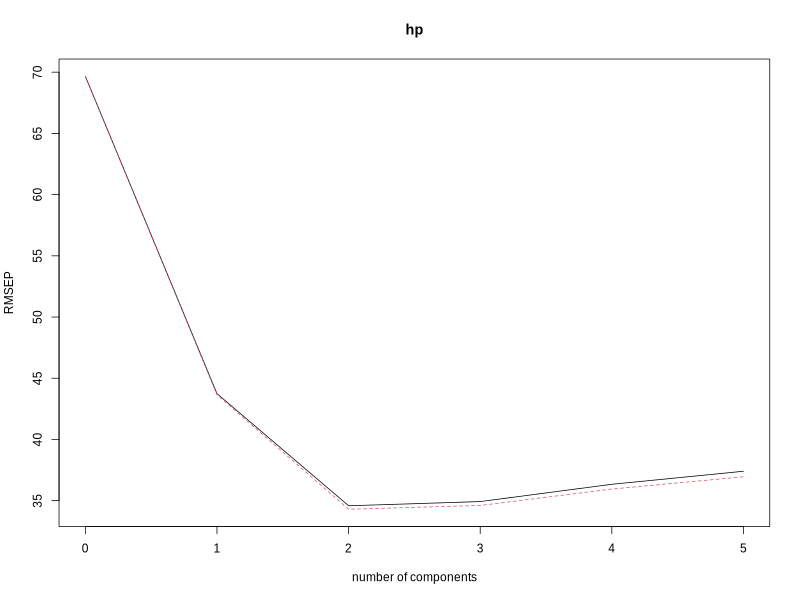

agg_record_227772316 
                   2

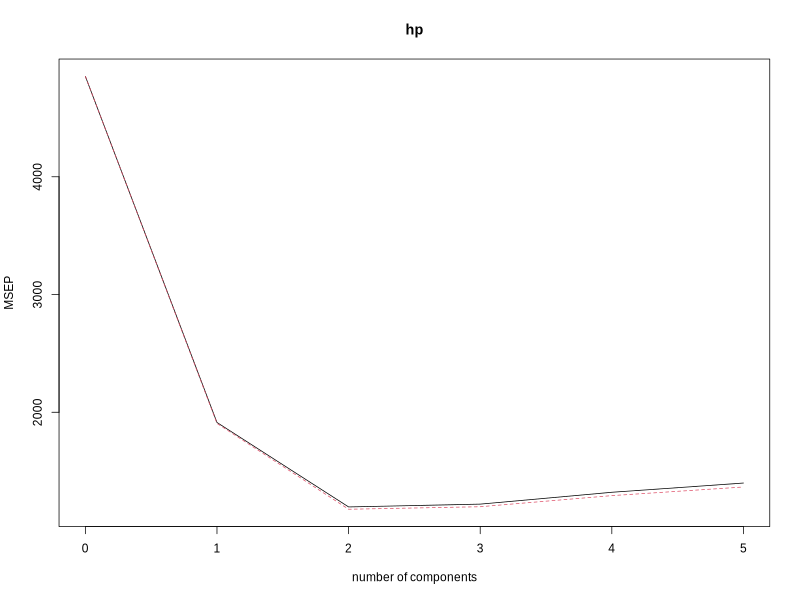

agg_record_227772316 
                   2

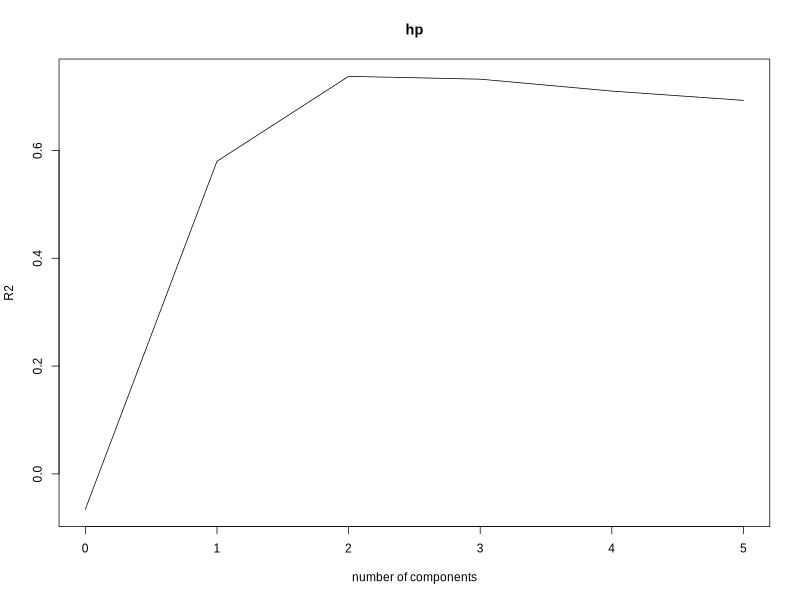

In [26]:
# Visual representation of RMSE - using IRdisplay for proper text rendering

# Plot 1: RMSEP
tmp1 <- tempfile(fileext = ".png")
png(tmp1, width = 800, height = 600)
validationplot(model)
dev.off()
display_png(file = tmp1)

# Plot 2: MSEP
tmp2 <- tempfile(fileext = ".png")
png(tmp2, width = 800, height = 600)
validationplot(model, val.type = "MSEP")
dev.off()
display_png(file = tmp2)

# Plot 3: R2
tmp3 <- tempfile(fileext = ".png")
png(tmp3, width = 800, height = 600)
validationplot(model, val.type = "R2")
dev.off()
display_png(file = tmp3)

### 📊 DETAILED INTERPRETATION GUIDE: PCR Validation Plots

The validation plots visualize what the summary table shows numerically. These three plots help you **see** the optimal number of components.

---

#### Plot 1: RMSEP (Root Mean Square Error of Prediction)

```
RMSEP
    ^
 70 │ *
    │  \
 60 │   \
    │    \
 50 │     *___
    │         \___*___
 45 │              \___*___*   ← Near-minimum plateau
    │
    +─────────────────────────→
        1   2   3   4   5
           Components

READING THE PLOT:
• Y-axis = Prediction error (in original units of Y)
• X-axis = Number of components in model
• Look for where the curve FLATTENS (stops improving)
• LOWER is BETTER
```

---

#### Plot 2: MSEP (Mean Square Error of Prediction)

```
MSEP
    ^
5000│ *
    │  \
4000│   \
    │    \
3000│     *___
    │         \___
2000│              *___*___*
    │
    +─────────────────────────→
        1   2   3   4   5
           Components

NOTE: MSEP = RMSEP squared
      Same interpretation, just different scale
      Emphasizes larger errors more than RMSEP
```

---

#### Plot 3: R² (Variance Explained)

```
R²
    ^
0.8 │                   *___*
    │              *___/
0.6 │         *___/
    │     ___/
0.4 │ *__/
    │
0.2 │
    │
    +─────────────────────────→
        1   2   3   4   5
           Components

READING THE PLOT:
• Y-axis = Proportion of outcome variance explained (0 to 1)
• X-axis = Number of components
• Look for where the curve FLATTENS (diminishing returns)
• HIGHER is BETTER
```

---

#### Using All Three Plots Together:

```
DECISION FRAMEWORK:

         RMSEP              MSEP               R²
           │                  │                 │
           │                  │                 │
    Look for          Same as          Look for
    MINIMUM           RMSEP            MAXIMUM
    (or plateau)      (squared)        (or plateau)
           │                  │                 │
           └────────┬─────────┴─────────┬───────┘
                    │                   │
                    v                   v
              All three should converge on
              the SAME optimal # of components!
```

---

#### Step-by-Step Visual Interpretation:

**Step 1: Find where RMSEP/MSEP stops decreasing**
```
RMSEP:  70 → 55 → 48 → 47 → 47 → 48
        ↓    ↓    ↓    ↓    ↓    ↓
        BIG  BIG  Small FLAT FLAT UP!
        drop drop drop
        
OPTIMAL: 3 or 4 components (where curve flattens)
```

**Step 2: Find where R² stops increasing**
```
R²:    0.40 → 0.55 → 0.62 → 0.64 → 0.65 → 0.65
       ↓      ↓      ↓      ↓      ↓      ↓
       BIG    BIG    Small  FLAT   FLAT   FLAT
       jump   jump   jump
       
OPTIMAL: 3 or 4 components (where gains become minimal)
```

**Step 3: Choose the SIMPLER model when performance is similar**
```
If 3 components and 4 components perform similarly:
→ Choose 3 components (parsimony principle)
```

---

#### Common Patterns and What They Mean:

**Pattern A: Clear Elbow**
```
RMSEP
    *
     \
      *___*___*___
```
INTERPRETATION: Clear optimal point exists. Easy decision.

**Pattern B: Continuous Improvement**
```
RMSEP
    *
     \
      \
       \
        *
```
INTERPRETATION: More components keep helping. Consider if you have enough data.

**Pattern C: Flat from Start**
```
RMSEP
    *___*___*___*
```
INTERPRETATION: Principal components don't help predict Y. PCR may not be appropriate.

**Pattern D: U-Shape (increases later)**
```
RMSEP
    *
     \___
         *___*
              /
             *
```
INTERPRETATION: Adding too many components causes overfitting. Stop before upturn.

---

#### Reading Confidence Intervals (if shown):

Some validation plots include dashed lines showing uncertainty:

```
RMSEP with CI
    │
 55 │     *─────────────*  ← Upper confidence bound
    │     │             │
 50 │─────*─────────────*  ← Point estimate
    │     │             │
 45 │     *─────────────*  ← Lower confidence bound
    │
    +─────2─────────────3──→
             Components

If confidence intervals OVERLAP between adjacent models:
→ They're not significantly different
→ Choose the SIMPLER model
```

---

#### Business Decision Example:

**Validation Plot Analysis:**

```
RMSEP:  $125K → $82K → $68K → $68K → $69K
           (1)   (2)    (3)    (4)    (5) components

R²:     0.48 → 0.63 → 0.64 → 0.64 → 0.64
```

**Business Translation:**
- "With 1 component, our sales predictions are off by ~$82K"
- "With 2 components, error drops to $68K (big improvement!)"
- "3+ components don't improve prediction (still ~$68K)"
- "We get 64% R² with just 2 components"

**DECISION:** Use **2 components**—simpler and just as accurate.

---

#### Quick Reference:

```
┌────────────────────────────────────────────────────────────┐
│           VALIDATION PLOT QUICK REFERENCE                   │
├────────────────────────────────────────────────────────────┤
│                                                             │
│  RMSEP PLOT: Look for where curve LEVELS OFF               │
│              Lower = Better                                 │
│              Stop when adding components doesn't help       │
│                                                             │
│  MSEP PLOT:  Same as RMSEP (just squared)                  │
│              Emphasizes large errors more                   │
│                                                             │
│  R² PLOT:    Look for where curve LEVELS OFF               │
│              Higher = Better                                │
│              Stop when gains become minimal                 │
│                                                             │
│  ALL PLOTS should suggest same # of components!            │
│                                                             │
└────────────────────────────────────────────────────────────┘
```

### Validation Plots: Selecting the Optimal Number of Components

**Visual Model Selection**

These plots help you decide how many principal components to include:

1. **RMSEP Plot:** Shows prediction error vs. number of components
   - Look for the "elbow" where adding more components stops improving RMSE
   - Select the fewest components that achieve near-minimum error

2. **MSEP Plot:** Mean Squared Error of Prediction (RMSEP squared)
   - Same interpretation, different scale

3. **R² Plot:** Shows variance explained vs. number of components
   - Higher is better
   - Look for diminishing returns

**The Parsimony Principle:**
In business modeling, simpler models are preferred when they perform comparably to complex ones. If 2 components achieve 90% of the accuracy of 5 components, choose 2 for:
- Easier interpretation
- Better generalization to new data
- More robust decision-making

In [27]:
# Use the Final Model to Make Predictions

# Define training and testing sets
train <- mtcars[1:25, c("hp", "mpg", "disp", "drat", "wt", "qsec")]
y_test <- mtcars[26:nrow(mtcars), c("hp")]
test <- mtcars[26:nrow(mtcars), c("mpg", "disp", "drat", "wt", "qsec")]

# Fit model on training data
model <- pcr(hp ~ mpg + disp + drat + wt + qsec, data = train, scale = TRUE, validation = "CV")

# Make predictions on test set using 2 components
pcr_pred <- predict(model, test, ncomp = 2)

# Calculate RMSE
rmse <- sqrt(mean((y_test - pcr_pred)^2))
cat("Test RMSE:", rmse)

Test RMSE: 56.86549

### 📊 DETAILED INTERPRETATION GUIDE: Test RMSE and Prediction Results

When you calculate RMSE on test data, you're measuring **real-world prediction accuracy**. This is the most important metric for evaluating whether your PCR model is useful.

---

#### Understanding the RMSE Calculation:

```r
# Calculate RMSE
rmse <- sqrt(mean((y_test - pcr_pred)^2))
```

**The Formula Breakdown:**
```
RMSE = √[ (1/n) × Σ(actual - predicted)² ]

                    ↓
    For each observation:
    (actual - predicted) = prediction error
    
    Square it to make all errors positive
    
    Average all squared errors
    
    Take square root to return to original units
```

---

#### Interpreting the RMSE Value:

| RMSE Value | Interpretation | Context Needed |
|------------|----------------|----------------|
| **Lower** | Better predictions | Always relative to scale of Y |
| **= 0** | Perfect prediction | Never happens with real data |
| **> SD of Y** | Model is worse than guessing the mean! | Red flag - check model |

---

#### Putting RMSE in Context:

```
TO UNDERSTAND IF YOUR RMSE IS "GOOD":

Compare RMSE to:
┌───────────────────────────────────────────────────────┐
│                                                        │
│  1. RANGE of Y variable                               │
│     RMSE / (max - min) × 100 = % of range             │
│     → Under 10% is usually good                       │
│                                                        │
│  2. MEAN of Y variable                                │
│     RMSE / mean × 100 = % error                       │
│     → Under 10-15% is usually acceptable              │
│                                                        │
│  3. STANDARD DEVIATION of Y                           │
│     RMSE / SD × 100 = normalized error                │
│     → Under 50% means model adds value                │
│                                                        │
│  4. BUSINESS REQUIREMENT                              │
│     Is the error small enough for your decision?      │
│     → Context-dependent                               │
│                                                        │
└───────────────────────────────────────────────────────┘
```

---

#### Example Interpretation:

```
Test RMSE: 29.6

Suppose we're predicting horsepower:
• Y values range from 52 to 335 hp
• Y mean = 146.7 hp
• Y standard deviation = 68.6 hp

INTERPRETATION:
• RMSE / Range = 29.6 / 283 = 10.5% → Acceptable
• RMSE / Mean = 29.6 / 146.7 = 20.2% → Moderate error
• RMSE / SD = 29.6 / 68.6 = 43.1% → Model explains most variance

CONCLUSION: Predictions are typically off by ~30 hp,
            which is about 20% of the average horsepower.
            This may be acceptable for some applications.
```

---

#### Comparing CV RMSE vs Test RMSE:

```
HEALTHY PATTERN:

Cross-Validation RMSE:  44.69  (from summary)
Test RMSE:              29.60  (from held-out data)

↓ If they're SIMILAR (±20%):
  → Model generalizes well
  → Training and test data come from same population

↓ If Test RMSE is MUCH HIGHER:
  → Model is overfit to training data
  → May need fewer components

↓ If Test RMSE is MUCH LOWER:
  → Lucky test sample (small N)
  → Or test data is "easier" than training
```

---

#### Reading the Prediction vs Actual Table:

```
# Compare predictions vs actual
comparison <- data.frame(Actual = actual, Predicted = as.vector(pcr_predictions))
head(comparison)

      Actual  Predicted
1     180.0     165.3     ← Error: -14.7 (under-predicted)
2     175.0     182.1     ← Error: +7.1 (over-predicted)
3     245.0     238.9     ← Error: -6.1 (very close!)
4     113.0     128.4     ← Error: +15.4 (over-predicted)
5      91.0      98.2     ← Error: +7.2 (over-predicted)
```

**What to Look For:**

| Pattern | Interpretation | Action |
|---------|----------------|--------|
| Errors randomly distributed | Good - no systematic bias | None needed |
| Consistently over-predicting | Model bias - predicts too high | Check for missing variables |
| Larger errors for extreme values | Heteroscedasticity | Consider data transformation |
| One or two huge errors | Outliers | Investigate those cases |

---

#### Business Decision Framework:

```
┌─────────────────────────────────────────────────────────────┐
│           IS YOUR MODEL GOOD ENOUGH?                         │
├─────────────────────────────────────────────────────────────┤
│                                                              │
│  STEP 1: Define "acceptable" error                          │
│  ─────────────────────────────────                          │
│  "We can tolerate predictions within ±$10K of actual"       │
│  "We need at least 80% directional accuracy"                │
│                                                              │
│  STEP 2: Check if RMSE meets your threshold                 │
│  ────────────────────────────────────────                   │
│  If RMSE ≤ Acceptable Error → Model is useful!             │
│  If RMSE > Acceptable Error → Need improvement              │
│                                                              │
│  STEP 3: Consider prediction intervals                      │
│  ─────────────────────────────────────                      │
│  ~68% of predictions within ±1 RMSE of actual               │
│  ~95% of predictions within ±2 RMSE of actual               │
│                                                              │
└─────────────────────────────────────────────────────────────┘
```

---

#### Business Application Example:

**Scenario:** Predicting monthly sales with PCR

```
Test RMSE: $15,200

Sales context:
• Average monthly sales: $125,000
• Sales range: $80,000 - $200,000
• Business threshold: Need predictions within ±$20,000

ANALYSIS:
• RMSE ($15,200) < Threshold ($20,000) ✓
• Typical error is 12% of average sales
• ~95% of predictions will be within ±$30,400

BUSINESS DECISION:
"The PCR model meets our accuracy requirement. We can use it for
budget planning, knowing that monthly forecasts will typically
be within $15K of actual, and almost always within $30K."
```

---

#### Quick Reference:

```
┌────────────────────────────────────────────────────────────┐
│           RMSE INTERPRETATION QUICK REFERENCE               │
├────────────────────────────────────────────────────────────┤
│                                                             │
│  RMSE = Average prediction error (in Y's units)            │
│  LOWER is BETTER                                           │
│                                                             │
│  Context matters:                                           │
│  • RMSE of 50 when predicting in millions → Great!         │
│  • RMSE of 50 when predicting in hundreds → Terrible!      │
│                                                             │
│  Quick benchmarks:                                          │
│  • RMSE / Mean < 10% → Excellent                           │
│  • RMSE / Mean < 20% → Good                                │
│  • RMSE / Mean < 30% → Acceptable                          │
│  • RMSE / Mean > 50% → Model needs work                    │
│                                                             │
│  ~68% of predictions within ±1 RMSE                        │
│  ~95% of predictions within ±2 RMSE                        │
│                                                             │
└────────────────────────────────────────────────────────────┘
```

### Making Predictions and Calculating RMSE

**The Ultimate Test: Out-of-Sample Performance**

This section demonstrates the complete PCR workflow:
1. **Split data** into training (model building) and test (validation) sets
2. **Train model** on training data only
3. **Predict** on test data using selected number of components
4. **Evaluate** using RMSE (Root Mean Square Error)

**Understanding RMSE:**
$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$$

- Measures average prediction error in original units
- Lower is better
- Allows comparison between models

**Business Application:**
If predicting monthly sales (in thousands), an RMSE of 5 means your predictions are typically off by about $5,000—enabling you to assess if the model is accurate enough for decision-making.

---

## In-Class Exercise: PCR on Spectrometric Data

### Real-World Application: Chemical Calibration

This exercise uses spectrometric data from SAS—a classic PCR application in **chemometrics** (chemical data analysis). The same principles apply to:
- **Quality control:** Predicting product quality from sensor readings
- **Healthcare:** Diagnosing conditions from blood test panels
- **Finance:** Predicting outcomes from correlated financial indicators

**The Dataset:**
- **Outcome:** `tot_log` (total amino acid concentration, log-transformed)
- **Predictors:** `f1` through `f10` (spectral frequency readings)

**The Challenge:**
Spectral readings are highly correlated—adjacent frequencies provide redundant information. Standard regression would be unstable; PCR provides stable predictions.

**Your Task:**
1. Fit a PCR model using `tot_log` as the outcome and `f1-f10` as predictors
2. Select 4 components based on cross-validation results
3. Predict on the test dataset
4. Calculate RMSE to assess model accuracy

**Key Learning Objective:**
Understand how PCR transforms correlated predictors into a stable, interpretable predictive model.

In [28]:
# Load training and test data
pcr_train <- read.csv("/workspaces/MS3313_base_template/data/module_3/PCR_TRAIN DATA.csv", header = TRUE)
pcr_test <- read.csv("/workspaces/MS3313_base_template/data/module_3/PCR_TEST DATA.csv", header = TRUE)

# View structure
str(pcr_train)
head(pcr_train)

'data.frame':	18 obs. of  37 variables:
 $ obsnam : chr  "17mix35" "19mix35" "21mix35" "23mix35" ...
 $ tot    : num  3e-05 3e-05 3e-05 3e-05 3e-05 3e-05 3e-05 3e-05 3e-05 3e-05 ...
 $ tyr    : num  0.00 3.00e-07 7.50e-07 1.50e-06 3.00e-06 7.50e-06 1.50e-05 2.25e-05 2.70e-05 2.85e-05 ...
 $ f1     : num  -6.21 -5.52 -5.52 -5.29 -4.6 ...
 $ f2     : num  -5.81 -5.29 -5.29 -4.71 -4.07 ...
 $ f3     : num  -5.11 -4.82 -4.5 -4.26 -3.76 ...
 $ f4     : num  -3.96 -3.86 -3.86 -3.6 -3.26 ...
 $ f5     : num  -2.9 -2.83 -2.83 -2.73 -2.6 ...
 $ f6     : num  -2.27 -2.25 -2.28 -2.24 -2.19 ...
 $ f7     : num  -1.68 -1.68 -1.72 -1.68 -1.68 ...
 $ f8     : num  -1.24 -1.22 -1.26 -1.25 -1.27 ...
 $ f9     : num  -0.9 -0.907 -0.939 -0.925 -0.958 ...
 $ f10    : num  -0.659 -0.658 -0.694 -0.697 -0.729 ...
 $ f11    : num  -0.497 -0.501 -0.536 -0.534 -0.573 ...
 $ f12    : num  -0.395 -0.4 -0.444 -0.437 -0.47 ...
 $ f13    : num  -0.335 -0.345 -0.384 -0.381 -0.422 ...
 $ f14    : num  -0.315 -0.323 -0

,obsnam,tot,tyr,f1,f2,f3,f4,f5,f6,f7,⋯,f25,f26,f27,f28,f29,f30,try,tyr_log,try_log,tot_log
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,17mix35,3e-05,0.0e+00,-6.215,-5.809,-5.114,-3.963,-2.897,-2.269,-1.675,⋯,-1.520,-1.804,-2.044,-2.269,-2.496,-2.714,3.000e-05,-8.000000,-4.522879,-4.522879
2,19mix35,3e-05,3.0e-07,-5.516,-5.294,-4.823,-3.858,-2.827,-2.249,-1.683,⋯,-1.541,-1.814,-2.058,-2.289,-2.496,-2.712,2.970e-05,-6.522879,-4.527244,-4.522879
3,21mix35,3e-05,7.5e-07,-5.519,-5.294,-4.501,-3.863,-2.827,-2.280,-1.716,⋯,-1.565,-1.841,-2.084,-2.320,-2.521,-2.729,2.925e-05,-6.124939,-4.533874,-4.522879
4,23mix35,3e-05,1.5e-06,-5.294,-4.705,-4.262,-3.605,-2.726,-2.239,-1.681,⋯,-1.579,-1.852,-2.090,-2.316,-2.521,-2.743,2.850e-05,-5.823909,-4.545155,-4.522879
5,25mix35,3e-05,3.0e-06,-4.600,-4.069,-3.764,-3.262,-2.598,-2.191,-1.680,⋯,-1.619,-1.886,-2.141,-2.359,-2.585,-2.792,2.700e-05,-5.522879,-4.568636,-4.522879
6,27mix35,3e-05,7.5e-06,-3.812,-3.376,-3.026,-2.726,-2.249,-1.919,-1.541,⋯,-1.784,-2.058,-2.297,-2.507,-2.727,-2.970,2.250e-05,-5.124939,-4.647817,-4.522879


In [29]:
# Fit PCR model using tot_log as DV and f1-f10 as IVs
set.seed(123)
pcr_model <- pcr(tot_log ~ f1 + f2 + f3 + f4 + f5 + f6 + f7 + f8 + f9 + f10, 
                 data = pcr_train, 
                 scale = TRUE, 
                 validation = "CV")

# View summary
summary(pcr_model)

Data: 	X dimension: 18 10 
	Y dimension: 18 1
Fit method: svdpc
Number of components considered: 10

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           0.248   0.2684  0.06681  0.05680  0.06407  0.05526  0.05834
adjCV        0.248   0.2677  0.06604  0.05584  0.06276  0.05383  0.05710
       7 comps  8 comps  9 comps  10 comps
CV     0.05651  0.05944  0.06389    0.1102
adjCV  0.05497  0.05772  0.06190    0.1050

TRAINING: % variance explained
         1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         59.399    98.39    99.88    99.95    99.98    99.99   100.00   100.00
tot_log    3.624    94.86    97.05    97.06    97.68    97.68    97.96    98.04
         9 comps  10 comps
X         100.00    100.00
tot_log    98.06     98.11


agg_record_668775779 
                   2

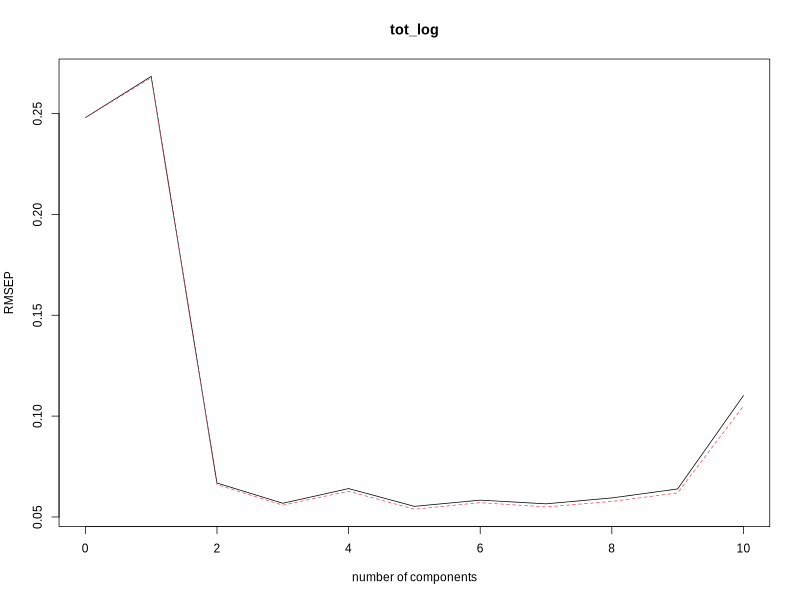

agg_record_668775779 
                   2

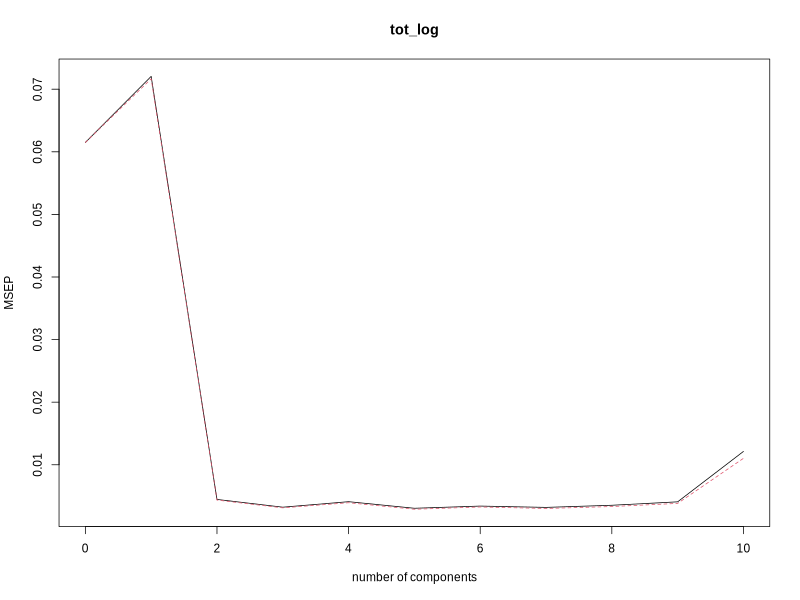

In [30]:
# Validation plots - using IRdisplay for proper text rendering

# Plot 1: RMSEP
tmp1 <- tempfile(fileext = ".png")
png(tmp1, width = 800, height = 600)
validationplot(pcr_model)
dev.off()
display_png(file = tmp1)

# Plot 2: MSEP
tmp2 <- tempfile(fileext = ".png")
png(tmp2, width = 800, height = 600)
validationplot(pcr_model, val.type = "MSEP")
dev.off()
display_png(file = tmp2)

In [31]:
# Predict on test data using 4 components
pcr_predictions <- predict(pcr_model, pcr_test, ncomp = 4)

# Calculate RMSE
actual <- pcr_test$tot_log
rmse_test <- sqrt(mean((actual - pcr_predictions)^2))
cat("Test RMSE with 4 components:", rmse_test)

# Compare predictions vs actual
comparison <- data.frame(Actual = actual, Predicted = as.vector(pcr_predictions))
head(comparison)

Test RMSE with 4 components: 0.0462024

,Actual,Predicted
,<int>,<dbl>
1,-6,-5.968929
2,-6,-6.051369
3,-6,-5.999762
4,-6,-5.967526
5,-6,-5.944464
6,-6,-5.950790


---

## Multidimensional Scaling (MDS)

### Visualizing Competitive Positioning and Market Perception

**What is MDS?**

Multidimensional Scaling creates a **visual map** that represents similarities or dissimilarities between objects. Objects that are more similar appear closer together; dissimilar objects appear farther apart.

**The Key Difference from PCA:**
- **PCA** starts with variables and finds underlying dimensions
- **MDS** starts with distances/similarities and creates a spatial representation

**Business Applications (Perceptual Mapping):**

| Application | Input Data | Output |
|-------------|-----------|--------|
| **Brand Positioning** | Customer similarity ratings between brands | Map showing competitive landscape |
| **Product Development** | Feature comparison data | Identify market gaps |
| **Market Segmentation** | Customer behavioral distances | Visual customer clusters |
| **Store Location** | Geographic/demographic distances | Optimal store placement |

**How MDS Works:**

1. **Input:** A matrix of distances or dissimilarities between objects
2. **Process:** Find coordinates in low-dimensional space (usually 2D) that preserve these distances as accurately as possible
3. **Output:** A map where position reflects similarity relationships

**Stress: Measuring MDS Quality**
- **Stress < 0.05:** Excellent representation
- **Stress 0.05-0.10:** Good representation
- **Stress 0.10-0.20:** Fair representation
- **Stress > 0.20:** Poor—consider more dimensions

**Strategic Value:**
MDS enables executives to literally **see** competitive positioning, making abstract market dynamics tangible and actionable.

### MDS Example: Australian Cities Distance

**Learning MDS with Geographic Data**

This example uses actual distances between Australian cities—a perfect introduction because:
- We know what the "right answer" should look like (a map of Australia)
- Geographic distances are intuitive to understand
- We can visually verify if MDS correctly recovered the spatial relationships

**Business Parallel:**
Just as cities have geographic distances, products have "perceptual distances" based on customer ratings. If customers rate Coca-Cola and Pepsi as very similar but both as very different from Gatorade, MDS would place Coke and Pepsi close together, with Gatorade farther away.

**R Function:** `cmdscale()` performs classical MDS
- `eig = TRUE`: Returns eigenvalues (for assessing fit quality)
- `k = 2`: Number of dimensions in output (2D map)

In [32]:
# Load Australian cities distance data
dist.au <- read.csv("http://rosetta.reltech.org/TC/v15/Mapping/data/dist-Aus.csv")

# Set city names as row names and remove first column
row.names(dist.au) <- dist.au[, 1]
dist.au <- dist.au[, -1]
dist.au

,A,AS,B,D,H,M,P,S
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
A,0,1328,1600,2616,1161,653,2130,1161
AS,1328,0,1962,1289,2463,1889,1991,2026
B,1600,1962,0,2846,1788,1374,3604,732
D,2616,1289,2846,0,3734,3146,2652,3146
H,1161,2463,1788,3734,0,598,3008,1057
M,653,1889,1374,3146,598,0,2720,713
P,2130,1991,3604,2652,3008,2720,0,3288
S,1161,2026,732,3146,1057,713,3288,0


### 📊 DETAILED INTERPRETATION GUIDE: MDS Distance Matrix Input

Before we can interpret MDS output, we need to understand the **input**: a distance or dissimilarity matrix. This is fundamentally different from PCA, which starts with raw variable measurements.

---

#### Understanding the Distance Matrix:

```
             Adelaide  Alice.S  Brisbane  Darwin  Hobart  Melbourne  Perth  Sydney
Adelaide          0      1532     1998    3027    1174       732    2699    1380
Alice.Springs  1532         0     2017    1499    2704      2232    2468    2608
Brisbane       1998      2017        0    3425    2170      1710    4325     979
Darwin         3027      1499     3425       0    4050      3765    4033    3938
Hobart         1174      2704     2170    4050       0       706    3366    1138
Melbourne       732      2232     1710    3765     706         0    3430     873
Perth          2699      2468     4325    4033    3366      3430       0    4005
Sydney         1380      2608      979    3938    1138       873    4005       0
```

---

#### How to Read a Distance Matrix:

| Feature | Meaning |
|---------|---------|
| **Diagonal values** | Always 0 (distance from object to itself) |
| **Symmetric** | Upper and lower triangle are mirrors |
| **Cell [i,j]** | Distance between object i and object j |
| **Units** | Depends on data (here: kilometers) |

---

#### Types of Distance Inputs:

```
┌─────────────────────────────────────────────────────────────┐
│              WHAT CAN BE A "DISTANCE"?                       │
├─────────────────────────────────────────────────────────────┤
│                                                              │
│  GEOGRAPHIC DISTANCES (this example)                        │
│  • Kilometers between cities                                │
│  • Miles between stores                                     │
│                                                              │
│  PERCEPTUAL DISTANCES (brand perception)                    │
│  • "How different are Coke and Pepsi?" (1-10 scale)        │
│  • "Rank similarity of these 8 brands"                      │
│                                                              │
│  CALCULATED DISTANCES (from measurements)                   │
│  • Euclidean distance from multiple variables               │
│  • Correlation-based distance (1 - correlation)             │
│                                                              │
│  BEHAVIORAL DISTANCES (from transactions)                   │
│  • Customers who buy similar products → small distance     │
│  • Products bought by same customers → small distance       │
│                                                              │
└─────────────────────────────────────────────────────────────┘
```

---

#### Key Properties of Distance Matrices:

**1. Larger values = MORE different (farther apart)**
```
Adelaide ↔ Alice Springs: 1532 km (relatively close)
Adelaide ↔ Darwin: 3027 km (very far!)
```

**2. Smaller values = MORE similar (closer together)**
```
Melbourne ↔ Adelaide: 732 km (neighbors)
Sydney ↔ Brisbane: 979 km (neighbors)
```

**3. The matrix determines the MDS map**
```
IF Melbourne-Adelaide is small (732)
AND Perth-Adelaide is large (2699)
THEN MDS will place Melbourne NEAR Adelaide
     and Perth FAR from Adelaide
```

---

#### Business Distance Matrix Examples:

**Example 1: Brand Perception Survey**
```
"On a scale of 1-10, how similar are these soft drinks?"

           Coke  Pepsi  Sprite  Fanta  Gatorade
Coke         0     2      5       6       8
Pepsi        2     0      5       6       8
Sprite       5     5      0       3       7
Fanta        6     6      3       0       7
Gatorade     8     8      7       7       0

INTERPRETATION:
• Coke & Pepsi (2) are VERY similar in customer perception
• Gatorade (8) is perceived as VERY different from colas
```

**Example 2: Product Co-Purchase Distance**
```
Distance = 1 - (% customers who bought both)

          Laptop  Mouse  Keyboard  Headphones  Monitor
Laptop       0     0.3     0.4       0.7        0.5
Mouse       0.3     0     0.5       0.8        0.7
Keyboard    0.4    0.5      0        0.6        0.6
Headphones  0.7    0.8     0.6        0         0.9
Monitor     0.5    0.7     0.6       0.9         0

INTERPRETATION:
• Laptop & Mouse (0.3) often bought together
• Headphones & Monitor (0.9) rarely bought together
```

---

#### What MDS Does With This Input:

```
INPUT: Distance Matrix         OUTPUT: 2D Coordinates
                                       
Adelaide-Perth = 2699         →    Adelaide at (1.5, 0.3)
Adelaide-Melbourne = 732      →    Perth at (-2.1, -0.5)
Perth-Melbourne = 3430        →    Melbourne at (1.2, 0.1)
...                                ...

MDS finds coordinates that PRESERVE these distances
as closely as possible in 2D space
```

---

#### Data Preparation Tips:

| Issue | Solution |
|-------|----------|
| **Different scales** | Standardize before computing distances |
| **Missing values** | Impute or use pairwise-complete distances |
| **Non-symmetric** | Average upper and lower triangle |
| **Negative values** | Add constant to make all positive |

---

#### Quick Reference:

```
┌────────────────────────────────────────────────────────────┐
│           DISTANCE MATRIX QUICK REFERENCE                   │
├────────────────────────────────────────────────────────────┤
│                                                             │
│  INPUT TO MDS: Square matrix of distances/dissimilarities  │
│                                                             │
│  DIAGONAL: Always zeros (distance to self)                 │
│  SYMMETRIC: Matrix[i,j] = Matrix[j,i]                      │
│                                                             │
│  LARGE VALUE = Objects are DIFFERENT/FAR                   │
│  SMALL VALUE = Objects are SIMILAR/CLOSE                   │
│                                                             │
│  MDS will preserve these relationships in 2D:              │
│  • Close in matrix → Close on map                          │
│  • Far in matrix → Far on map                              │
│                                                             │
└────────────────────────────────────────────────────────────┘
```

agg_record_613313056 
                   2

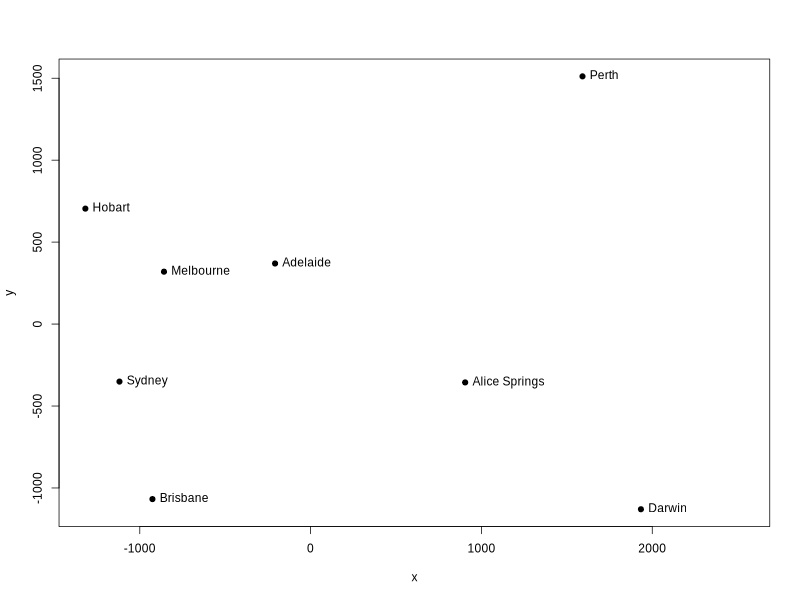

In [34]:
# Run Multidimensional Scaling (MDS) with cmdscale()
fit <- cmdscale(dist.au, eig = TRUE, k = 2)
x <- fit$points[, 1]
y <- fit$points[, 2]

# Visualize the result - using IRdisplay for proper text rendering
city.names <- c("Adelaide", "Alice Springs", "Brisbane", "Darwin", "Hobart",
                "Melbourne", "Perth", "Sydney")

tmp <- tempfile(fileext = ".png")
png(tmp, width = 800, height = 600)
plot(x, y, pch = 19, xlim = range(x) + c(0, 600))
text(x, y, pos = 4, labels = city.names)
dev.off()
display_png(file = tmp)

### 📊 DETAILED INTERPRETATION GUIDE: How to Read the MDS Map

The MDS map converts your distance matrix into a **visual spatial representation**. Objects that are similar (small distance) appear close together; dissimilar objects appear far apart.

---

#### Anatomy of an MDS Plot:

```
                    MDS Plot
         ^
      Y  │           Darwin●
 Coord   │              
         │                     Brisbane●
         │
         │    Alice●
         │    Springs
         │
         │           Sydney●
         │                   
         │       Adelaide●    Melbourne●
         │                    Hobart●
         │ Perth●
         └────────────────────────────────→
                    X Coordinate
```

---

#### What Each Element Means:

| Element | Representation | Interpretation |
|---------|---------------|----------------|
| **Points (●)** | Objects from distance matrix | Cities, brands, products, etc. |
| **Horizontal position** | First MDS dimension | Often the most important distinction |
| **Vertical position** | Second MDS dimension | Secondary distinction |
| **Distance between points** | Original dissimilarity | Preserved as closely as possible |
| **Clusters of points** | Similar objects | Objects grouped together are alike |

---

#### Step-by-Step Interpretation:

**Step 1: Identify CLUSTERS (objects close together)**
```
         Darwin●     ← Isolated (unique)
              
                     Brisbane●
                              \
                               Sydney● ← East coast cluster
    Alice●                    /
    Springs               Adelaide●──Melbourne●
                                   \
                                    Hobart● ← Southeast cluster
    Perth●          ← Isolated (far west)
```

**Step 2: Note DISTANCES between clusters**
```
Perth is FAR from the eastern cluster
→ Perth is geographically isolated from east coast cities

Darwin is FAR from the southern cluster
→ Darwin is in the tropical north, different from southern cities
```

**Step 3: Interpret the AXES (if meaningful)**
```
X-AXIS (horizontal):
• Left side: Western Australia (Perth)
• Right side: Eastern Australia (Brisbane, Sydney)
→ X represents EAST-WEST geography

Y-AXIS (vertical):
• Top: Northern (Darwin)
• Bottom: Southern (Melbourne, Hobart)
→ Y represents NORTH-SOUTH geography
```

---

#### Orientation Note (IMPORTANT!):

```
⚠️  MDS COORDINATES ARE ARBITRARY IN ROTATION AND REFLECTION!

What this means:
• The map might be "upside down" or "mirrored"
• North might appear at bottom, east at left
• This is NORMAL - only RELATIVE positions matter

Solution:
• Flip axes if needed to match intuition
• As done in the code: x <- 0 - x; y <- 0 - y
```

---

#### Interpreting Clusters in Business Context:

**Brand Perception Example:**
```
                    │
    Luxury●         │        Performance●
        \           │           /
         Premium●   │     Sport●
                    │
    ────────────────┼────────────────
                    │
         Value●     │     Economy●
        /           │           \
    Budget●         │        Basic●
                    │

INTERPRETATION:
• Upper left cluster: Luxury/Premium brands
• Upper right cluster: Performance/Sport brands  
• Lower cluster: Value-oriented brands

BUSINESS INSIGHT:
"There's a clear market gap between Premium and Performance - 
no brand occupies the upper-middle space."
```

---

#### What to Look For:

| Pattern | Interpretation | Business Application |
|---------|----------------|---------------------|
| **Tight clusters** | Objects perceived as very similar | These are direct competitors |
| **Isolated points** | Unique positioning | Differentiated brand/product |
| **Large gaps** | Market white space | Opportunity for new product |
| **Even spacing** | Good differentiation | Healthy competitive market |
| **All bunched together** | Little differentiation | Commoditized market |

---

#### Reading Distance on the Map:

```
DISTANCE ON MAP ≈ ORIGINAL DISTANCE IN MATRIX

Example check:
Map: Perth far from Sydney (long visual distance)
Matrix: Perth-Sydney = 4005 km (large number)
✓ Consistent!

Map: Adelaide close to Melbourne (short visual distance)
Matrix: Adelaide-Melbourne = 732 km (small number)
✓ Consistent!

If map distances DON'T match original distances well:
→ Check the "stress" value (see next section)
```

---

#### Understanding Stress (MDS Quality Measure):

```
STRESS = How well the map preserves original distances

Stress Formula:
√[Σ(d_ij - δ_ij)² / Σd_ij²]

Where:
d_ij = distance on the MDS map
δ_ij = original distance from matrix
```

| Stress Value | Interpretation | Action |
|--------------|----------------|--------|
| **< 0.05** | Excellent fit | Trust the map completely |
| **0.05 - 0.10** | Good fit | Map is reliable |
| **0.10 - 0.20** | Fair fit | Interpret major patterns only |
| **> 0.20** | Poor fit | Consider 3D MDS or different approach |

---

#### Business Application - Brand Positioning:

**Reading a Brand Perception Map:**

```
          Innovative
              ^
              │
    Apple●    │         Tesla●
              │    
              │
    ──────────┼──────────→ Premium
              │
              │    BMW●
    Samsung●  │
              │
              │
              v
         Traditional

KEY FINDINGS:
1. Apple: Innovative but moderate premium
2. Tesla: Most innovative AND premium
3. BMW: Premium but traditional  
4. Samsung: Middle of the road on both dimensions

STRATEGIC IMPLICATIONS:
• Tesla has unique positioning (no direct competitors nearby)
• Samsung could move toward Innovation to differentiate
• Gap exists in "Innovative + Affordable" quadrant
```

---

#### Quick Reference:

```
┌────────────────────────────────────────────────────────────┐
│              MDS MAP QUICK REFERENCE                        │
├────────────────────────────────────────────────────────────┤
│                                                             │
│  CLOSE POINTS = Similar objects                            │
│  FAR POINTS = Different objects                            │
│                                                             │
│  CLUSTERS = Groups of similar items                        │
│  ISOLATED POINTS = Unique/differentiated items             │
│  GAPS = Market opportunities                               │
│                                                             │
│  AXES: Try to interpret what they represent                │
│        (e.g., Quality vs Price, Modern vs Traditional)     │
│                                                             │
│  ORIENTATION: Can be flipped/rotated - only relative       │
│               positions matter, not absolute!              │
│                                                             │
│  STRESS: Lower is better (< 0.10 is good)                 │
│                                                             │
└────────────────────────────────────────────────────────────┘
```

### Interpreting the MDS Output

**From Numbers to Spatial Understanding**

The MDS algorithm has converted our distance matrix into 2D coordinates. Notice how:
- Cities that are close geographically (e.g., Sydney and Melbourne) appear close on the map
- Cities that are far apart (e.g., Perth and Brisbane) appear distant

**Important Note About Orientation:**
MDS coordinates are arbitrary in terms of rotation and reflection—the algorithm finds relative positions, not absolute orientation. This is why we may need to flip axes to match our mental model of Australia's geography.

**Business Implication:**
When presenting perceptual maps to stakeholders, choose an orientation that makes intuitive sense (e.g., premium products at top, budget at bottom).

agg_record_654713737 
                   2

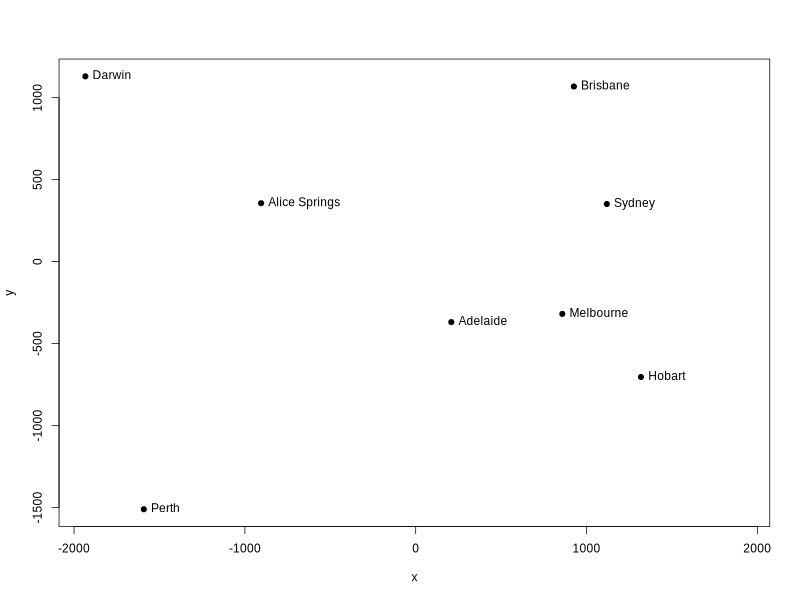

In [35]:
# Flip both x- and y-axis to match actual map orientation
# (Darwin and Brisbane to the top/north)
x <- 0 - x
y <- 0 - y

tmp <- tempfile(fileext = ".png")
png(tmp, width = 800, height = 600)
plot(x, y, pch = 19, xlim = range(x) + c(0, 600))
text(x, y, pos = 4, labels = city.names)
dev.off()
display_png(file = tmp)

### Adjusting Orientation for Intuitive Interpretation

**Making Maps Meaningful**

By flipping both axes, we align the MDS output with our mental model of Australia:
- North (Darwin) at the top
- South (Hobart) at the bottom
- West (Perth) on the left
- East (Sydney, Brisbane) on the right

**Strategic Presentation Tip:**
In brand positioning maps, consider placing:
- **Premium/High Quality** at top
- **Budget/Value** at bottom  
- **Traditional** on left
- **Innovative** on right

This creates an intuitive framework that executives can immediately understand and act upon.


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Warning message:
“`graph.full()` was deprecated in igraph 2.1.0.
ℹ Please use `make_full_graph()` instead.”
Warning message:
“`layout.mds()` was deprecated in igraph 2.0.0.
ℹ Please use `layout_with_mds()` instead.”


agg_record_1142348699 
                    2

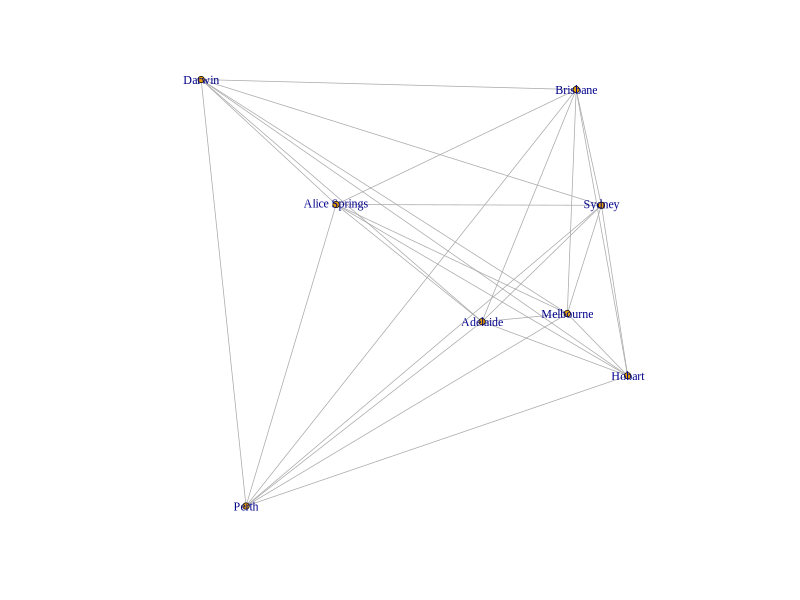

In [36]:
# MDS using igraph package
library(igraph)

g <- graph.full(nrow(dist.au))
V(g)$label <- city.names
layout <- layout.mds(g, dist = as.matrix(dist.au))

tmp <- tempfile(fileext = ".png")
png(tmp, width = 800, height = 600)
plot(g, layout = layout, vertex.size = 3)
dev.off()
display_png(file = tmp)

### Network Visualization with igraph

**MDS as Network Layout**

The `igraph` package provides another way to visualize MDS results—as a network graph. This is particularly useful when:
- Objects have direct relationships (like customers who bought similar products)
- You want to highlight connections between close items
- The audience is familiar with network diagrams

**Business Applications:**
- **Customer networks:** Who shops similarly to whom?
- **Product affinity:** Which products are purchased together?
- **Organizational charts:** Which departments collaborate most?

**R Function:** `layout.mds()` positions network nodes using MDS coordinates

### MDS Example: Iris Data - Discovering Natural Clusters

**From Dimensions to Discovery**

The Iris dataset contains measurements of 150 flowers from 3 species. MDS allows us to:
1. Compute distances between all flower pairs based on their measurements
2. Project these high-dimensional distances onto a 2D map
3. **Discover** that species naturally cluster together

**Why This Matters for Business:**

This demonstrates MDS's power for **unsupervised discovery**:
- You don't tell MDS which flowers belong to which species
- MDS finds the structure from similarity patterns alone

**Business Parallel:**
Imagine customer transaction data with no predefined segments. MDS can reveal:
- Natural customer clusters based on purchase patterns
- Products that belong in the same category based on co-purchase behavior
- Markets with similar characteristics for expansion planning

**Key Functions:**
- `dist()`: Computes Euclidean distances between observations
- `cmdscale()`: Performs MDS on the distance matrix

**Visualization Labels:**
The first two letters of each species name are used as labels, showing how MDS successfully separates the three species based purely on measurement similarity.

agg_record_1283858229 
                    2

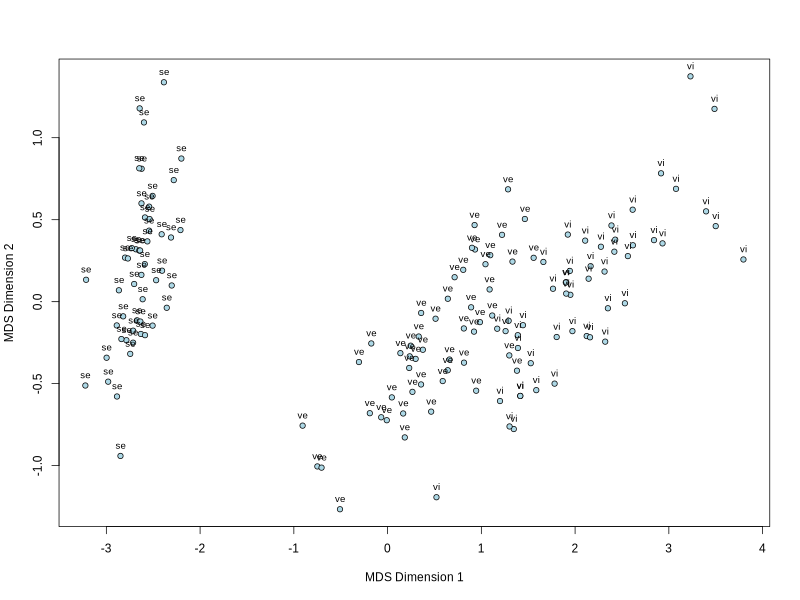

In [37]:
# MDS Example: Iris Data
library(cluster)

# Load iris data
data(iris)

# Perform MDS analysis on numeric columns only
mds_iris <- cmdscale(dist(iris[, 1:4]))

# Plot using IRdisplay for proper text rendering
tmp <- tempfile(fileext = ".png")
png(tmp, width = 800, height = 600)

# Create blank plot
plot(mds_iris[, 1], mds_iris[, 2],
     type = "n", xlab = "MDS Dimension 1",
     ylab = "MDS Dimension 2")

# Plot points and label them with first two letters of species name
points(mds_iris[, 1], mds_iris[, 2],
       pch = 21, bg = "lightblue")
text(mds_iris[, 1], mds_iris[, 2],
     labels = substr(iris$Species, 1, 2),
     pos = 3, cex = 0.8)

# pch: shape of points (21 = filled circle)
# bg: background color

dev.off()
display_png(file = tmp)

### 📊 DETAILED INTERPRETATION GUIDE: MDS for Cluster Discovery (Iris Example)

This example demonstrates MDS's power for **unsupervised discovery**—finding natural groupings without prior knowledge of categories.

---

#### What the Plot Shows:

```
    MDS Dimension 2
         ^
         │     se se
         │   se se se se          vi
         │  se se se se se      vi vi
         │ se se se se       vi vi vi vi
         │se se                vi vi vi
         │                  vi vi vi
         │              vi vi vi vi
         │           vi vi vi
         │       vi    ve ve ve
         │          ve ve ve ve ve
         │       ve ve ve ve ve ve
         │    ve ve ve ve ve
         │  ve ve
         └────────────────────────────────→ MDS Dimension 1
         
    se = setosa (first 2 letters)
    ve = versicolor
    vi = virginica
```

---

#### Step-by-Step Interpretation:

**Step 1: Identify the clusters**
```
CLUSTER 1 (Top-left):    All "se" labels → SETOSA species
CLUSTER 2 (Middle-right): All "vi" labels → VIRGINICA species  
CLUSTER 3 (Bottom):       All "ve" labels → VERSICOLOR species
```

**Step 2: Note cluster separation**
```
SETOSA: Completely separated from others
        → Very distinct flower measurements
        
VERSICOLOR & VIRGINICA: Some overlap
        → More similar in measurements
```

**Step 3: Measure discrimination quality**
```
Well-separated clusters = MDS successfully reveals natural structure
Overlapping clusters = Some similarity between groups
```

---

#### The Power of Unsupervised Discovery:

```
WHAT WE GAVE MDS:
• 150 flowers with 4 measurements each
• Distances computed from measurements
• NO species labels used!

WHAT MDS FOUND:
• Three distinct clusters
• Clusters perfectly match actual species!
• Natural structure emerged from data alone
```

---

#### Business Application - Customer Segmentation:

**Scenario:** You have transaction data for 1000 customers but no pre-defined segments.

```
INPUT: Customer × Product purchase matrix
       → Compute distances between customers
       → Run MDS

OUTPUT:
         ^
         │     ●●●●           Premium Shoppers
         │    ●●●●●●
         │
         │         ●●●●●●●    Occasional Buyers
         │        ●●●●●●●●●
         │
         │  ●●●●●●●           Bargain Hunters
         │ ●●●●●●●●●
         └─────────────────────→

DISCOVERY:
• Three natural customer segments emerged
• No pre-defined rules needed!
• Now investigate what distinguishes each cluster
```

---

#### Validating Cluster Interpretation:

| Validation Method | What to Do |
|-------------------|------------|
| **Known labels** | Check if clusters match categories (like species) |
| **Profile analysis** | Compare average values of original variables per cluster |
| **External validation** | Check if clusters predict other outcomes |
| **Stability** | Rerun with subset—do same clusters appear? |

---

#### Limitations to Note:

```
⚠️ CAUTION:

1. MDS shows 2D projection of high-dimensional relationships
   → Some information is lost in projection
   
2. Cluster boundaries are subjective
   → MDS doesn't draw lines; YOU interpret clusters
   
3. Number of clusters not automatic
   → You decide how many groups to identify
   
4. Verification needed
   → Always profile clusters to confirm meaningful differences
```

---

#### Quick Reference for Cluster Discovery:

```
┌────────────────────────────────────────────────────────────┐
│         MDS FOR CLUSTER DISCOVERY                           │
├────────────────────────────────────────────────────────────┤
│                                                             │
│  1. Compute distances from original measurements           │
│  2. Run MDS to get 2D coordinates                          │
│  3. Plot and look for natural groupings                    │
│  4. Identify clusters by visual inspection                 │
│  5. Validate by profiling each cluster                     │
│                                                             │
│  WELL-SEPARATED CLUSTERS → Strong natural structure        │
│  OVERLAPPING CLUSTERS → Groups are similar on these vars   │
│  NO CLUSTERS → Data may not have grouping structure        │
│                                                             │
└────────────────────────────────────────────────────────────┘
```

---

## Comparing Dimensionality Reduction Techniques

### When to Use Which Method

| Criterion | PCA | MDS | Factor Analysis |
|-----------|-----|-----|-----------------|
| **Input** | Raw variable measurements | Distance/similarity matrix | Raw variable measurements |
| **Goal** | Maximize variance explained | Preserve pairwise distances | Find latent factors |
| **Output** | Principal components | Spatial coordinates | Factor scores |
| **Interpretation** | Components are linear combinations | Position = similarity | Factors have theoretical meaning |
| **Best For** | Variable reduction, preprocessing | Perceptual mapping, visualization | Theory-driven constructs |
| **Data Type** | Continuous (metric) | Any (via appropriate distance) | Continuous (metric) |

### MDS vs Factor Analysis

1. **Both** uncover hidden patterns or relationships in data
2. **Both** require a matrix of measures of associations
3. **Factor Analysis** requires metric data; **MDS** can handle both metric and non-metric data
4. **MDS** is more useful for creating 2D maps for visual confirmation of relationships

### MDS vs PCA

1. **MDS** starts with similarities/dissimilarities/distances
2. **PCA** starts with a feature representation of observations
3. **PCA** maps from high-dimensional feature space to lower dimensions
4. **MDS** induces a spatial representation from similarity measures alone

### Practical Decision Framework

**Use PCA when:**
- You have many measured variables to reduce
- You want to create composite scores for further analysis
- Interpretable components are needed for explanation

**Use MDS when:**
- You have similarity/distance data (surveys, ratings)
- You need a visual map for strategic positioning
- The goal is pattern discovery and communication

**Use PCR when:**
- Predictors are correlated (multicollinearity)
- You need stable regression coefficients
- Prediction accuracy is the primary goal

---

## Summary: Key Takeaways for Business Analytics

### What We Learned

This module covered three powerful dimensionality reduction techniques essential for modern business analytics:

---

### 1. Principal Component Analysis (PCA)

**Purpose:** Transform many correlated variables into fewer uncorrelated components

**Key Steps:**
1. Normalize data (z-scores)
2. Compute correlation matrix
3. Extract principal components
4. Select components (scree plot, eigenvalue > 1, cumulative variance)
5. Interpret loadings to name components

**Business Value:**
- Simplify complex survey data into actionable dimensions
- Create customer segments from behavioral data
- Reduce noise while preserving signal

---

### 2. Principal Component Regression (PCR)

**Purpose:** Solve multicollinearity in regression by using PCA components as predictors

**Key Steps:**
1. Perform PCA on predictor variables
2. Select number of components via cross-validation
3. Regress outcome on components
4. Evaluate using RMSE on test data

**Business Value:**
- Stable predictions from correlated marketing metrics
- Robust forecasting models
- Better generalization to new data

---

### 3. Multidimensional Scaling (MDS)

**Purpose:** Create visual maps from distance/similarity data

**Key Steps:**
1. Start with distance or similarity matrix
2. Find coordinates that preserve pairwise distances
3. Visualize in 2D space
4. Interpret clusters and positions

**Business Value:**
- Brand positioning maps
- Competitive landscape visualization
- Market gap identification

---

### Connecting to Business Strategy

These techniques transform **data complexity into strategic clarity**:

| Challenge | Technique | Strategic Output |
|-----------|-----------|-----------------|
| "We have 50 customer survey questions" | PCA | 4 key satisfaction dimensions |
| "Our marketing variables are all correlated" | PCR | Stable sales prediction model |
| "How do customers perceive our brand vs. competitors?" | MDS | Visual positioning map |

**Remember:** The goal is not mathematical elegance—it's **actionable insights** that drive better business decisions.

---

## 📋 COMPREHENSIVE INTERPRETATION QUICK REFERENCE

This section provides a single-page reference for interpreting all outputs covered in this module.

---

### PCA Output Interpretation

#### Summary Table:
```
                          Comp.1    Comp.2    Comp.3
Standard deviation        1.85      1.29      0.94      ← SD² = eigenvalue
Proportion of Variance    0.378     0.184     0.099     ← % explained by THIS PC
Cumulative Proportion     0.378     0.562     0.661     ← Total % if keeping 1,2,3 PCs
```

**Decision Rule:** Keep components until Cumulative Proportion reaches 70-90%

#### Loadings Matrix:
```
Variable    PC1      PC2
VarA       +0.82   +0.15    ← Strong positive on PC1
VarB       -0.75   +0.45    ← Strong negative on PC1, moderate positive on PC2
VarC       +0.12   +0.88    ← Weak on PC1, strong on PC2
```

**Reading Rules:**
- |Loading| > 0.70 → Variable DEFINES this component
- |Loading| > 0.40 → Variable contributes meaningfully
- Same sign → Variables move together
- Opposite sign → Variables trade off

---

### Scree Plot Interpretation

```
    │*                    │* *
    │ \                   │    * *
    │  *___               │        * * *
    │      \__*__*        │
    └─────────────        └───────────────
    CLEAR ELBOW           NO CLEAR ELBOW
    Keep 2 components     Use Kaiser (>1) or 80% rule
```

---

### Biplot Interpretation

| Arrow Feature | Meaning |
|---------------|---------|
| **Same direction** | Positive correlation |
| **Opposite direction** | Negative correlation |
| **90° angle** | No correlation |
| **Long arrow** | Well-represented (high Cos²) |
| **Short arrow** | Poorly represented |

---

### Cos² Interpretation

| Cos² Range | Color | Interpretation |
|------------|-------|----------------|
| > 0.7 | Green | Trust completely |
| 0.4-0.7 | Orange | Interpret with caution |
| < 0.4 | Black | May need more components |

---

### PCR Output Interpretation

#### Validation (RMSEP):
```
       (Intercept)  1 comps  2 comps  3 comps  4 comps
CV          68.65    46.36    44.69    44.82    45.35
                              ↑
                        MINIMUM = optimal
```

**Decision Rule:** Choose fewest components with near-minimum RMSEP

#### Variance Explained:
```
       1 comps  2 comps  3 comps
X        69%     90%     96%     ← Predictor variance captured
hp       61%     69%     70%     ← Outcome variance explained (like R²)
```

---

### RMSE Interpretation

```
Context Check:
• RMSE / Mean < 10% → Excellent
• RMSE / Mean < 20% → Good  
• RMSE / Mean < 30% → Acceptable
• RMSE / Mean > 50% → Needs improvement

~68% of predictions within ±1 RMSE
~95% of predictions within ±2 RMSE
```

---

### MDS Interpretation

#### Distance Matrix:
- **Large value** = Objects are DIFFERENT
- **Small value** = Objects are SIMILAR

#### MDS Map:
- **Close points** = Similar objects
- **Far points** = Different objects
- **Clusters** = Groups of similar items
- **Gaps** = Market opportunities

#### Stress Quality:
| Stress | Quality |
|--------|---------|
| < 0.05 | Excellent |
| 0.05-0.10 | Good |
| 0.10-0.20 | Fair |
| > 0.20 | Poor |

---

### Method Selection Guide

| Your Situation | Use This |
|----------------|----------|
| Many correlated variables to reduce | **PCA** |
| Predicting with correlated predictors | **PCR** |
| Visualizing similarity/perception data | **MDS** |
| Survey items → underlying constructs | **PCA** → Factor Analysis |
| Brand positioning map | **MDS** |
| Forecasting with multicollinearity | **PCR** |

---

### Common Mistakes to Avoid

| Method | Common Mistake | Correct Approach |
|--------|----------------|------------------|
| **PCA** | Keeping all components | Keep until 70-90% variance |
| **PCA** | Not naming components | Always interpret loadings and name |
| **Scree** | Ignoring when no elbow | Use Kaiser + cumulative rules |
| **Biplot** | Reading exact distances | Only interpret relative positions |
| **Cos²** | Ignoring low values | Note which variables need more PCs |
| **PCR** | Choosing by training R² | Use cross-validation RMSEP |
| **RMSE** | No context | Always compare to mean/range of Y |
| **MDS** | Interpreting orientation | Only relative positions matter |

---

### Business Presentation Template

**For PCA:**
> "We reduced [N] survey questions into [K] key dimensions that capture [X%] of customer sentiment. The first dimension represents [interpretation of PC1], explaining [X%] of variation. The second dimension captures [interpretation of PC2]."

**For PCR:**
> "Our model predicts [outcome] with typical error of [RMSE], which is [X%] of average [outcome]. This uses [K] principal components that capture [X%] of predictor information."

**For MDS:**
> "The perceptual map shows [Brand A] and [Brand B] positioned close together, indicating customers perceive them similarly. [Brand C] occupies a unique position in the [direction] quadrant. A market gap exists in the [location] area."